# 0. Setting the scene

In [1]:
# 1. Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò (ColabÏù¥ÎùºÎ©¥ Ïã§Ìñâ)
!pip install squarify
!pip install category_encoders
!pip install catboost
!pip install xgboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.7/85.7 kB 4.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [2]:
# Core Libraries
import pandas as pd
import numpy as np
from scipy import stats
import random
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import squarify
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Libraries
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier
from category_encoders import TargetEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split


# Set random seed
rs = 42

# Ignore warnings
warnings.filterwarnings("ignore")

# Set color palette for Seaborn
colors= ['#1c76b6', '#a7dae9', '#eb6a20', '#f59d3d', '#677fa0', '#d6e4ed', '#f7e9e5']
sns.set_palette(colors)

# 1. Loading & checking dataset

In [3]:
import os
# Kaggle Ïù∏Ï¶ù Ï†ïÎ≥¥ ÏßÅÏ†ë ÏûÖÎ†• (Ïã§Ï†ú Í∞íÏúºÎ°ú Î∞îÍøîÏ£ºÏÑ∏Ïöî)
os.environ['KAGGLE_USERNAME'] = 'YOURUSERNAME'  # Ïã§Ï†ú kaggle Ïú†Ï†ÄÎ™Ö
os.environ['KAGGLE_KEY'] = 'YOURAPIKEY'        # Ïã§Ï†ú API ÌÇ§

# Kaggle API ÏÇ¨Ïö©
import kaggle
kaggle.api.authenticate()

# Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú (unzip ÌååÎùºÎØ∏ÌÑ∞ Ï†úÍ±∞)
kaggle.api.competition_download_files('playground-series-s4e11')

# ÏàòÎèôÏúºÎ°ú ÏïïÏ∂ï Ìï¥Ï†ú
import zipfile
with zipfile.ZipFile('playground-series-s4e11.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [4]:
# ÌòÑÏû¨ Ìè¥ÎçîÏùò ÌååÏùºÎì§ ÌôïÏù∏
print("ÌòÑÏû¨ Ìè¥ÎçîÏùò ÌååÏùºÎì§:")
for file in os.listdir('.'):
    print(f"- {file}")

ÌòÑÏû¨ Ìè¥ÎçîÏùò ÌååÏùºÎì§:
- .config
- test.csv
- train.csv
- playground-series-s4e11.zip
- sample_submission.csv
- sample_data


In [5]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÌôïÏù∏
if 'train.csv' in os.listdir('.'):
    train_df = pd.read_csv('train.csv')
    print("Train Îç∞Ïù¥ÌÑ∞ shape:", train_df.shape)
    print("\nTrain Îç∞Ïù¥ÌÑ∞ Ï≤´ 5Ìñâ:")
    print(train_df.head())

if 'test.csv' in os.listdir('.'):
    test_df = pd.read_csv('test.csv')
    print(f"\nTest Îç∞Ïù¥ÌÑ∞ shape: {test_df.shape}")

Train Îç∞Ïù¥ÌÑ∞ shape: (140700, 20)

Train Îç∞Ïù¥ÌÑ∞ Ï≤´ 5Ìñâ:
   id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \


In [6]:
train_df.head()

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [9]:
train_df.duplicated().value_counts()

False    140700
Name: count, dtype: int64

In [10]:
train_df.duplicated().value_counts()

False    140700
Name: count, dtype: int64

In [11]:
print(train_df['Have you ever had suicidal thoughts ?'].unique())

['No' 'Yes']


In [12]:
print(train_df['Gender'].unique())

['Female' 'Male']


In [13]:
print(train_df['Degree'].unique())

['BHM' 'LLB' 'B.Pharm' 'BBA' 'MCA' 'MD' 'BSc' 'ME' 'B.Arch' 'BCA' 'BE'
 'MA' 'B.Ed' 'B.Com' 'MBA' 'M.Com' 'MHM' 'BA' 'Class 12' 'M.Tech' 'PhD'
 'M.Ed' 'MSc' 'B.Tech' 'LLM' 'MBBS' 'M.Pharm' 'UX/UI Designer' 'MPA' 'BH'
 'Nalini' 'BEd' 'B.Sc' 'Veda' 'Bhopal' 'S.Tech' 'Degree' '20' 'Class 11'
 'H_Pharm' 'M' 'P.Com' 'BPharm' 'Business Analyst' 'M.Arch' 'LL.Com'
 'Data Scientist' 'MPharm' 'L.Ed' 'P.Pharm' 'Kalyan' 'Unite' 'BArch'
 'HR Manager' 'Badhya' 'S.Pharm' 'LLBA' 'Vrinda' 'M. Business Analyst'
 'Bhavesh' '0' 'LLCom' '29' 'MTech' 'Vivaan' 'BPA' 'Plumber' '5.61' 'Brit'
 'B.03' 'Ritik' '5.56' 'MEd' 'B' 'B BA' '7.06' 'B.B.Arch' 'ACA' 'Brithika'
 'CGPA' '24' 'M_Tech' 'Pihu' 'BB' 'Jhanvi' 'LLTech' 'Aarav' 'Entrepreneur'
 '8.56' 'LHM' 'Lata' 'S.Arch' 'Marsh' 'HCA' '5.88' 'B.Student' 'LL B.Ed'
 'M.S' 'Navya' 'Mahika' nan 'K.Ed' 'B.3.79' 'Mthanya'
 'Working Professional' 'Esha' 'LLS' 'LLEd' 'E.Tech' 'Doctor' 'N.Pharm'
 'LCA' 'B B.Com' 'RCA' 'Mihir' 'Advait']


In [14]:
train_df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [15]:
# Backup the original train dataframe
train_original = train_df.copy()

In [16]:
train_df.describe()

id            Age  Academic Pressure  Work Pressure  \
count  140700.000000  140700.000000       27897.000000  112782.000000   
mean    70349.500000      40.388621           3.142273       2.998998   
std     40616.735775      12.384099           1.380457       1.405771   
min         0.000000      18.000000           1.000000       1.000000   
25%     35174.750000      29.000000           2.000000       2.000000   
50%     70349.500000      42.000000           3.000000       3.000000   
75%    105524.250000      51.000000           4.000000       4.000000   
max    140699.000000      60.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27898.000000        27897.000000     112790.000000     140700.000000   
mean       7.658636            2.944940          2.974404          6.252679   
std        1.464466            1.360197          1.416078          3.853615   
min        5.030000            1.000000          1.000000          0.000000   
25%        6.290000            2.000000          2.000000          3.000000   
50%        7.770000            3.000000          3.000000          6.000000   
75%        8.920000            4.000000          4.000000         10.000000   
max       10.000000            5.000000          5.000000         12.000000   

       Financial Stress     Depression  
count     140696.000000  140700.000000  
mean           2.988983       0.181713  
std            1.413633       0.385609  
min            1.000000       0.000000  
25%            2.000000       0.000000  
50%            3.000000       0.000000  
75%            4.000000       0.000000  
max            5.000000       1.000000

In [17]:
test_df.describe()

id           Age  Academic Pressure  Work Pressure  \
count   93800.000000  93800.000000       18767.000000   75022.000000   
mean   187599.500000     40.321685           3.158576       3.011797   
std     27077.871962     12.393480           1.386666       1.403563   
min    140700.000000     18.000000           1.000000       1.000000   
25%    164149.750000     29.000000           2.000000       2.000000   
50%    187599.500000     42.000000           3.000000       3.000000   
75%    211049.250000     51.000000           4.000000       4.000000   
max    234499.000000     60.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  18766.000000        18767.000000       75026.00000      93800.000000   
mean       7.674016            2.939522           2.96092          6.247335   
std        1.465056            1.374242           1.41071          3.858191   
min        5.030000            1.000000           1.00000          0.000000   
25%        6.330000            2.000000           2.00000          3.000000   
50%        7.800000            3.000000           3.00000          6.000000   
75%        8.940000            4.000000           4.00000         10.000000   
max       10.000000            5.000000           5.00000         12.000000   

       Financial Stress  
count      93800.000000  
mean           2.978763  
std            1.414604  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000

# 2. Survey Data preprocessing

## 2.1. Age

In [18]:
# 1. Ïó∞Î†π Íµ¨Í∞Ñ ÏÑ§Ï†ï
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = list(range(1, len(bins)))  # [1, 2, ..., 9]

# 2. pd.cutÏúºÎ°ú Ï†ïÏàòÌòï Î†àÏù¥Î∏î Î∂ÄÏó¨
train_df['Age_Encoded'] = pd.cut(
    train_df['Age'],
    bins=bins,
    labels=labels,
    right=True  # (a, b] Ïò§Î•∏Ï™Ω Ìè¨Ìï®
)

# 3. pd.cutÏúºÎ°ú Ï†ïÏàòÌòï Î†àÏù¥Î∏î Î∂ÄÏó¨
test_df['Age_Encoded'] = pd.cut(
    test_df['Age'],
    bins=bins,
    labels=labels,
    right=True  # (a, b] Ïò§Î•∏Ï™Ω Ìè¨Ìï®
)

# 4. NaNÏù¥ ÏûàÏùÑ Ïàò ÏûàÏúºÎØÄÎ°ú Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÍ∏∞ Ï†ÑÏóê floatÏúºÎ°ú Î®ºÏ†Ä Ï∫êÏä§ÌåÖ ‚Üí NaN ‚Üí 0
train_df['Age_Encoded'] = train_df['Age_Encoded'].astype(float).fillna(0).astype(int)
test_df['Age_Encoded'] = test_df['Age_Encoded'].astype(float).fillna(0).astype(int)

# 5. ÌôïÏù∏
print(train_df['Age_Encoded'].value_counts().sort_index())

Age_Encoded
1    10070
2    13994
3    13068
4    12897
5    16347
6    17141
7    20512
8    17816
9    18855
Name: count, dtype: int64


In [19]:
# 5. ÌôïÏù∏
print(test_df['Age_Encoded'].value_counts().sort_index())

Age_Encoded
1     6680
2     9466
3     8886
4     8670
5    10768
6    11465
7    13663
8    11661
9    12541
Name: count, dtype: int64


In [20]:
train_df['Age'] = train_df['Age_Encoded']
train_df.drop(columns=['Age_Encoded'], inplace=True)

In [21]:
test_df['Age'] = test_df['Age_Encoded']
test_df.drop(columns=['Age_Encoded'], inplace=True)

## 2.2. CGPA

In [22]:
print(train_df['CGPA'].unique())

[    nan  8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04
  9.79    8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25
  7.83    9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74
  9.86    6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99
  5.24    9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71
  7.87    5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09
  9.82    8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64
  5.27    6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88
  5.32    6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79
  9.95    5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81
  6.03    5.56    5.68    5.14    7.61    6.17    8.17    9.87    8.75
  6.16    9.5     7.99    5.67    8.92    6.19    5.76    6.25    5.11
  5.58    5.65    9.89    8.03    6.61    9.41    8.64    7.21    8.28
  6.04    9.13    8.08    9.96    5.12    8.35    7.07    9.6     9.24
  8.54

In [23]:
# 0 Ïù¥ÏÉÅ 10 Ïù¥ÌïòÎ•º 1Ï†ê Îã®ÏúÑÎ°ú ÎÇòÎàî ‚Üí Ï¥ù 10Íµ¨Í∞Ñ
bins = np.arange(0, 11, 1)  # [0, 1, 2, ..., 10]
labels = list(range(len(bins) - 1))  # [0, 1, 2, ..., 9]

# Íµ¨Í∞Ñ Ïù∏ÏΩîÎî©: [0,1), [1,2), ..., [9,10)
train_df['CGPA_Encoded'] = pd.cut(
    train_df['CGPA'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True  # 0 Ìè¨Ìï®
)

# Íµ¨Í∞Ñ Ïù∏ÏΩîÎî©: [0,1), [1,2), ..., [9,10)
test_df['CGPA_Encoded'] = pd.cut(
    test_df['CGPA'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True  # 0 Ìè¨Ìï®
)

# NaN ‚Üí 0 Ï≤òÎ¶¨ ÌõÑ Ï†ïÏàò Î≥ÄÌôò
train_df['CGPA_Encoded'] = train_df['CGPA_Encoded'].astype(float).fillna(0).astype(int)
test_df['CGPA_Encoded'] = test_df['CGPA_Encoded'].astype(float).fillna(0).astype(int)

# ÌôïÏù∏
print(train_df['CGPA_Encoded'].value_counts().sort_index())

CGPA_Encoded
0    112860
5      5404
6      4311
7      5543
8      6407
9      6175
Name: count, dtype: int64


In [24]:
train_df['CGPA'] = train_df['CGPA_Encoded']
train_df.drop(columns=['CGPA_Encoded'], inplace=True)

In [25]:
test_df['CGPA'] = test_df['CGPA_Encoded']
test_df.drop(columns=['CGPA_Encoded'], inplace=True)

## 2.3 Gender


In [26]:
train_df['Female'] = (train_df['Gender'] == 'Female').astype(int)
test_df['Female'] = (test_df['Gender'] == 'Female').astype(int)

train_df['Male'] = (train_df['Gender'] == 'Male').astype(int)
test_df['Male'] = (test_df['Gender'] == 'Male').astype(int)

## 2.4 Have you ever had suicidal thoughts ?, Family History of Mental Illness

In [27]:
Suicide_map = {'Yes': 1, 'No': 0}
train_df['Have you ever had suicidal thoughts?'] = train_df['Have you ever had suicidal thoughts ?'].map(Suicide_map)
test_df['Have you ever had suicidal thoughts?'] = test_df['Have you ever had suicidal thoughts ?'].map(Suicide_map)

Family_map = {'Yes': 1, 'No': 0}
train_df['Family History of Mental Illness'] = train_df['Family History of Mental Illness'].map(Family_map)
test_df['Family History of Mental Illness'] = test_df['Family History of Mental Illness'].map(Family_map)

In [28]:
print(train_df['Have you ever had suicidal thoughts?'].unique())
print(train_df['Family History of Mental Illness'].unique())

[0 1]
[0 1]


In [29]:
print(test_df['Have you ever had suicidal thoughts?'].unique())
print(test_df['Family History of Mental Illness'].unique())

[0 1]
[1 0]


In [30]:
train_df['Suicidal Thoughts'] = train_df['Have you ever had suicidal thoughts?']
test_df['Suicidal Thoughts'] = test_df['Have you ever had suicidal thoughts?']

train_df.drop(columns=['Have you ever had suicidal thoughts?'], inplace=True)
test_df.drop(columns=['Have you ever had suicidal thoughts?'], inplace=True)

## 2.5 Profession

In [31]:
train_df['Working Professional'] = (train_df['Working Professional or Student'] == 'Working Professional').astype(int)
test_df['Working Professional'] = (test_df['Working Professional or Student'] == 'Working Professional').astype(int)

train_df['Student'] = (train_df['Working Professional or Student'] == 'Student').astype(int)
test_df['Student'] = (test_df['Working Professional or Student'] == 'Student').astype(int)

train_df['Working Professional'] = (train_df['Working Professional or Student'] == 'Working Professional').astype(int)
test_df['Working Professional'] = (test_df['Working Professional or Student'] == 'Working Professional').astype(int)

In [32]:
print(train_df['Profession'].unique())

['Chef' 'Teacher' nan 'Business Analyst' 'Finanancial Analyst' 'Chemist'
 'Electrician' 'Software Engineer' 'Data Scientist' 'Plumber'
 'Marketing Manager' 'Accountant' 'Entrepreneur' 'HR Manager'
 'UX/UI Designer' 'Content Writer' 'Educational Consultant'
 'Civil Engineer' 'Manager' 'Pharmacist' 'Financial Analyst' 'Architect'
 'Mechanical Engineer' 'Customer Support' 'Consultant' 'Judge'
 'Researcher' 'Pilot' 'Graphic Designer' 'Travel Consultant'
 'Digital Marketer' 'Lawyer' 'Research Analyst' 'Sales Executive' 'Doctor'
 'Unemployed' 'Investment Banker' 'Family Consultant' 'B.Com' 'BE'
 'Student' 'Yogesh' 'Dev' 'MBA' 'LLM' 'BCA' 'Academic' 'Profession'
 'FamilyVirar' 'City Manager' 'BBA' 'Medical Doctor'
 'Working Professional' 'MBBS' 'Patna' 'Unveil' 'B.Ed' 'Nagpur' 'Moderate'
 'M.Ed' 'Analyst' 'Pranav' 'Visakhapatnam' 'PhD' 'Yuvraj']


In [33]:
# Feature engineering: map 'Profession' to simplified categories (1: noise, 2: unemployed/student, 3: valid professions)
profession_map = {
    'nan': 0,
    # Noise or invalid entries
    'Yogesh': 1, 'Dev': 1, 'Patna': 1, 'Pranav': 1, 'Unveil': 1, 'Nagpur': 1,
    'Visakhapatnam': 1, 'Yuvraj': 1, 'Moderate': 1,
    'Profession': 1, 'FamilyVirar': 1,

    # Unemployed or student - ÌïôÏúÑÎßå Ïç®ÎÇ∏ Í≤ΩÏö∞Îäî ÌïôÏÉùÏúºÎ°ú Í∞ÑÏ£ºÌïòÏóøÏùå
    'Unemployed': 2, 'Student': 2, 'Working Professional': 2, 'MBA': 2, 'LLM': 2, 'PhD': 2, 'BBA': 2,
    'B.Ed': 2, 'B.Com': 2, 'BCA': 2, 'BE': 2, 'M.Ed': 2,

    # Valid professions
    'Chef': 3, 'Teacher': 3, 'Electrician': 3, 'Plumber': 3, 'Customer Support': 3,
    'UX/UI Designer': 3, 'Educational Consultant': 3, 'City Manager': 3, 'Travel Consultant': 3, 'Graphic Designer': 3, 'Digital Marketer': 3,
    'Manager': 3, 'Content Writer': 3, 'Sales Executive': 3, 'Marketing Manager': 3, 'HR Manager': 3,

    #Knowledge workers
    'Doctor': 4, 'Medical Doctor': 4, 'Lawyer': 4,
    'Judge': 4, 'Pharmacist': 4, 'Pilot': 4, 'Civil Engineer': 4, 'Architect': 4, 'Mechanical Engineer': 4,
    'Financial Analyst': 4, 'Software Engineer': 4, 'Academic': 1,
    'Accountant': 4, 'Consultant': 2, 'Research Analyst': 4,
    'Investment Banker': 4, 'Business Analyst': 4, 'Researcher': 4
}

train_df['Profession'] = train_df['Profession'].map(profession_map)
test_df['Profession'] = test_df['Profession'].map(profession_map)

In [34]:
print(train_df['Profession'].unique())
print(test_df['Profession'].unique())

[ 3. nan  4.  2.  1.]
[ 4.  3. nan  2.  1.]


In [35]:
train_df['Profession'][train_df['Profession'].isna()].unique()
test_df['Profession'][test_df['Profession'].isna()].unique()

array([nan])

In [36]:
train_df['Profession'] = train_df['Profession'].astype(float).fillna(0).astype(int)
test_df['Profession'] = test_df['Profession'].astype(float).fillna(0).astype(int)

## 2.6 Sleeping Duration

In [37]:
sleep_mapping = {
    'More than 8 hours': 9.0,
    'Less than 5 hours': 4.5,
    'than 5 hours': 4.5,
    '5-6 hours': 5.5,
    '6-7 hours': 7.5,
    '6-8 hours': 7.5,
    '7-8 hours': 7.5,
    '8-9 hours': 9.0,
    '9-11 hours': 9.0,
    '10-11 hours': 9.0,
    '9-5': 7.5,
    '9-5 hours': 7.5,
    '10-6 hours': 9.0,
    '1-2 hours': 4.5,
    '2-3 hours': 4.5,
    '3-4 hours': 4.5,
    '4-5 hours': 4.5,
    '4-6 hours': 5.5,
    '1-3 hours': 4.5,
    '3-6 hours': 4.5,
    '1-6 hours': 4.5,
    '8 hours': 7.5,
    '45': 7.5,
    '49 hours': 7.5,
    '35-36 hours': 5.5,
    '40-45 hours': 7.5,
    '45-48 hours': 7.5,
    '55-66 hours': 9.0,
}

In [38]:
train_df['Sleep Hours'] = train_df['Sleep Duration'].map(sleep_mapping)
test_df['Sleep Hours'] = test_df['Sleep Duration'].map(sleep_mapping)

In [39]:
train_df['Sleep Duration'] = train_df['Sleep Hours'].fillna(7.5)
test_df['Sleep Duration'] = test_df['Sleep Hours'].fillna(7.5)

## 2.7 Dietary Habits

In [40]:
print(train_df['Dietary Habits'].unique())

['Healthy' 'Unhealthy' 'Moderate' 'Yes' 'Pratham' 'BSc' 'Gender' '3'
 'More Healthy' 'Less than Healthy' 'Mihir' '1.0' 'Hormonal' 'Electrician'
 nan 'No Healthy' 'Less Healthy' 'M.Tech' 'Vegas' 'No' 'Male' 'Indoor'
 'Class 12' '2']


In [41]:
diet_map = {
    'Healthy': 3,
    'More Healthy': 3,

    'Unhealthy': 1,
    'Less Healthy': 1,
    'No Healthy': 1,
    'Hormonal': 1,

    'Moderate': 2,
    'Less than Healthy': 2
}
# healthy :3 , unhealthy: 1, moderate: 2
# Ï†ïÏ†úÎêú Ïª¨Îüº ÏÉùÏÑ±
train_df['Dietary_Category'] = train_df['Dietary Habits'].map(diet_map)
test_df['Dietary_Category'] = test_df['Dietary Habits'].map(diet_map)

In [42]:
print(train_df['Dietary_Category'].isna().sum())
print(test_df['Dietary_Category'].isna().sum())

21
27


In [43]:
train_df['Dietary_Category'] = train_df['Dietary_Category'].fillna(2)
test_df['Dietary_Category'] = test_df['Dietary_Category'].fillna(2)

## 2.8. Degree

In [44]:
# Feature engineering: map 'Degree' to academic levels (0: noise/unknown, 1: high school or below, 2: bachelor's, 3: master's, 4: doctorate/medical)
degree_map = {
    # Noise / invalid / misc
    '0': 0, '20': 0, '24': 0, '29': 0, '5.56': 0, '5.61': 0, '5.88': 0, '7.06': 0, '8.56': 0,
    'Brit': 0, 'CGPA': 0, 'Esha': 0, 'Mihir': 0, 'Navya': 0, 'Advait': 0, 'Jhanvi': 0, 'Aarav': 0,
    'Vivaan': 0, 'Mahika': 0, 'Pihu': 0, 'Lata': 0, 'Veda': 0, 'Nalini': 0, 'Working Professional': 0,
    'Business Analyst': 0, 'Doctor': 0, 'Entrepreneur': 0, 'Ritik': 0, 'Bhopal': 0, 'Indore': 0, 'Pune': 0,
    'Bhavesh': 0, 'Vrinda': 0, 'Mthanya': 0,
    'H_Pharm': 0, 'P.Com': 0, 'P.Pharm': 0, 'S.Tech': 0, 'S.Arch': 0, 'S.Pharm': 0,
    'K.Ed': 0, 'N.Pharm': 0, 'RCA': 0, 'ACA': 0, 'Marsh': 0, 'Brithika': 0, 'Badhya': 0,
    'ME': 0, 'MBBS': 4, 'UX/UI Designer': 0, 'BH': 0, 'Degree': 0, 'M': 0,
    'Data Scientist': 0, 'Kalyan': 0, 'Unite': 0, 'HR Manager': 0, 'Plumber': 0, 'B': 0,
    'M_Tech': 0, 'BB': 0, 'HCA': 0, 'B.Student': 0, 'E.Tech': 0,

    # High school or below
    'Class 11': 1, 'Class 12': 1, 'Diploma': 1, 'High School': 1,

    # Bachelor's
    'BA': 2, 'B.A': 2, 'BSc': 2, 'B.Sc': 2, 'B.Com': 2, 'BEd': 2, 'B.Ed': 2, 'BBA': 2, 'BHM': 2,
    'B.Arch': 2, 'BCA': 2, 'BE': 2, 'B.Tech': 2, 'BPharm': 2, 'B.Pharm': 2, 'BArch': 2, 'BStudent': 2,
    'B.B.Arch': 2, 'B BA': 2, 'B.03': 2, 'B.3.79': 2, 'BPA': 2, 'B B.Com': 2,

    # Master's
    'MA': 3, 'M.A': 3, 'MBA': 3, 'M.Com': 3, 'MHM': 3, 'M.Tech': 3, 'MTech': 3, 'MCA': 3,
    'MSc': 3, 'M.Sc': 3, 'MPA': 3, 'MPharm': 3, 'M.Pharm': 3, 'M.S': 3,
    'M.Ed': 3, 'MEd': 3, 'M.Arch': 3, 'M. Business Analyst': 3,

    # Doctorate or medical
    'PhD': 4, 'Doctorate': 4, 'MD': 4, 'LLB': 4, 'LLM': 4, 'LL.Com': 4, 'LLCom': 4, 'LLBA': 4, 'LLTech': 4,
    'LHM': 4, 'LCA': 4, 'LLEd': 4, 'L.Ed': 4, 'LL B.Ed': 4, 'LLS': 4
}

# Apply mapping
train_df['Degree Encoded'] = train_df['Degree'].map(degree_map)
test_df['Degree Encoded'] = test_df['Degree'].map(degree_map)

In [45]:
print(train_df['Degree Encoded'].unique())

[ 2.  4.  3.  0.  1. nan]


In [46]:
train_df['Degree'] = train_df['Degree Encoded'].fillna(-1)
test_df['Degree'] = test_df['Degree Encoded'].fillna(-1)

In [47]:
# Drop intermediate column
train_df = train_df.drop(columns=['Degree Encoded'])
test_df = test_df.drop(columns=['Degree Encoded'])

## 2.9 Green Space Per Capita

In [48]:
green_space_per_capita = {
    'Ludhiana': 0.8,
    'Varanasi': 24.78,
    'Visakhapatnam': 0.18,
    'Mumbai': 9.36,
    'Kanpur': 1.3,
    'Ahmedabad': 9.38,
    'Thane': 35,
    'Nashik': 8,
    'Bangalore': 3.31,
    'Patna': 2,
    'Rajkot': 15,
    'Jaipur': 6.67,
    'Pune': 17,
    'Lucknow': 7,
    'Meerut': 3,
    'Agra': 18,
    'Surat': 5.90,
    'Faridabad': 3,
    'Hyderabad': 8.2,
    'Srinagar': 2.6,
    'Ghaziabad': 1.5,
    'Kolkata': 6.61,
    'Chennai': 18.05,
    'Kalyan': 2,
    'Nagpur': 17.49,
    'Vadodara': 8,
    'Vasai-Virar': 15,
    'Delhi': 10.41,
    'Bhopal': 18.62,
    'Indore': 20,
    'Morena': 30
}

population_density = {
    'Ludhiana': 9781,
    'Varanasi': 2367,
    'Visakhapatnam': 3900,
    'Mumbai': 20482,
    'Kanpur': 14449,
    'Ahmedabad': 11975,
    'Thane': 11500,
    'Nashik': 5872,
    'Bangalore': 4381,
    'Patna': 11667,
    'Rajkot': 10195,
    'Jaipur': 6491,
    'Pune': 6039,
    'Lucknow': 5459,
    'Meerut': 8493,
    'Agra': 11300,
    'Surat': 13600,
    'Faridabad': 9233,
    'Hyderabad': 10859,
    'Srinagar': 5283,
    'Ghaziabad': 10341,
    'Kolkata': 24306,
    'Chennai': 26903,
    'Kalyan': 11620,
    'Nagpur': 11470,
    'Vadodara': 8775,
    'Vasai-Virar': 9962,
    'Delhi': 11320,
    'Bhopal': 7154,
    'Indore': 11250,
    'Morena': 2340
}

In [49]:
# Map features to train and test datasets
train_df['GreenSpace'] = train_df['City'].map(green_space_per_capita)
train_df['PopulationDensity'] = train_df['City'].map(population_density)

test_df['GreenSpace'] = test_df['City'].map(green_space_per_capita)
test_df['PopulationDensity'] = test_df['City'].map(population_density)

In [50]:
# Fill missing values with column mean
train_df['GreenSpace'].fillna(train_df['GreenSpace'].mean(), inplace=True)
train_df['PopulationDensity'].fillna(train_df['PopulationDensity'].mean(), inplace=True)

test_df['GreenSpace'].fillna(test_df['GreenSpace'].mean(), inplace=True)
test_df['PopulationDensity'].fillna(test_df['PopulationDensity'].mean(), inplace=True)

# 3. EDA

## 3.1. Stress, Sudicidal thoughts and Depression

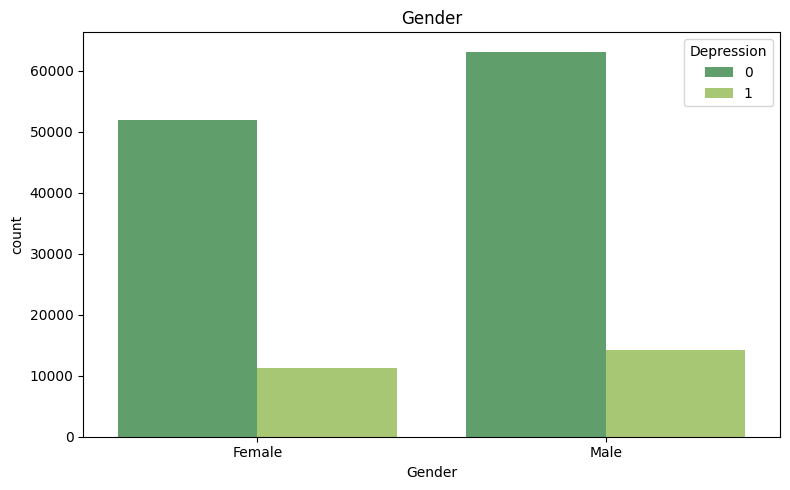

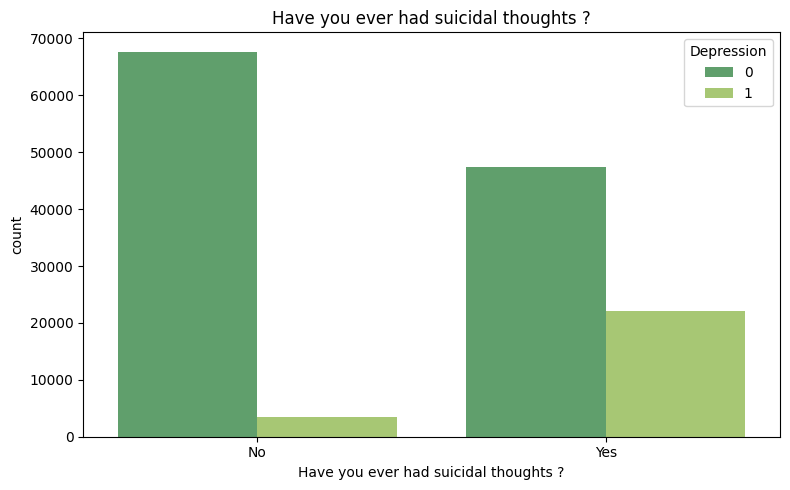

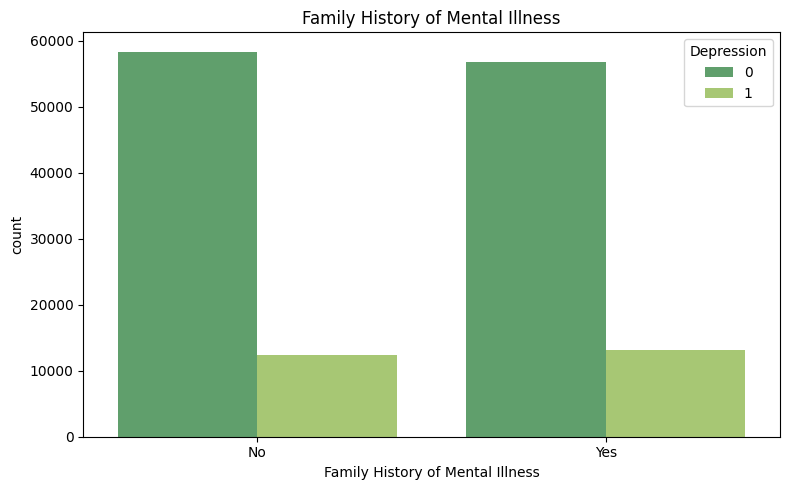

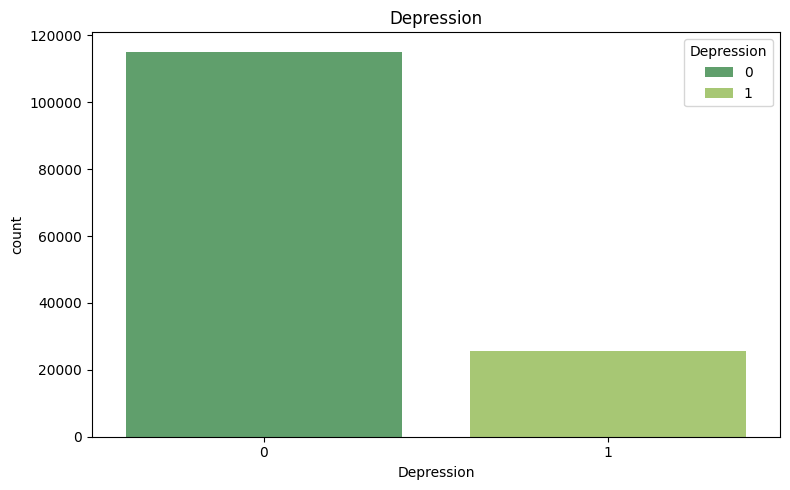

In [51]:
# Countplots for categorical columns with counts and percentages
categorical_columns_to_plot = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']

total = len(train_df)
for column in categorical_columns_to_plot:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=train_original, x=column, palette='summer', hue = 'Depression')
    plt.title(f'{column}')

 # Add count and percentage labels centered lower inside each bar
    for p in ax.patches:
        count = int(p.get_height())
        percent = 100 * count / total

    plt.tight_layout()
    plt.show()


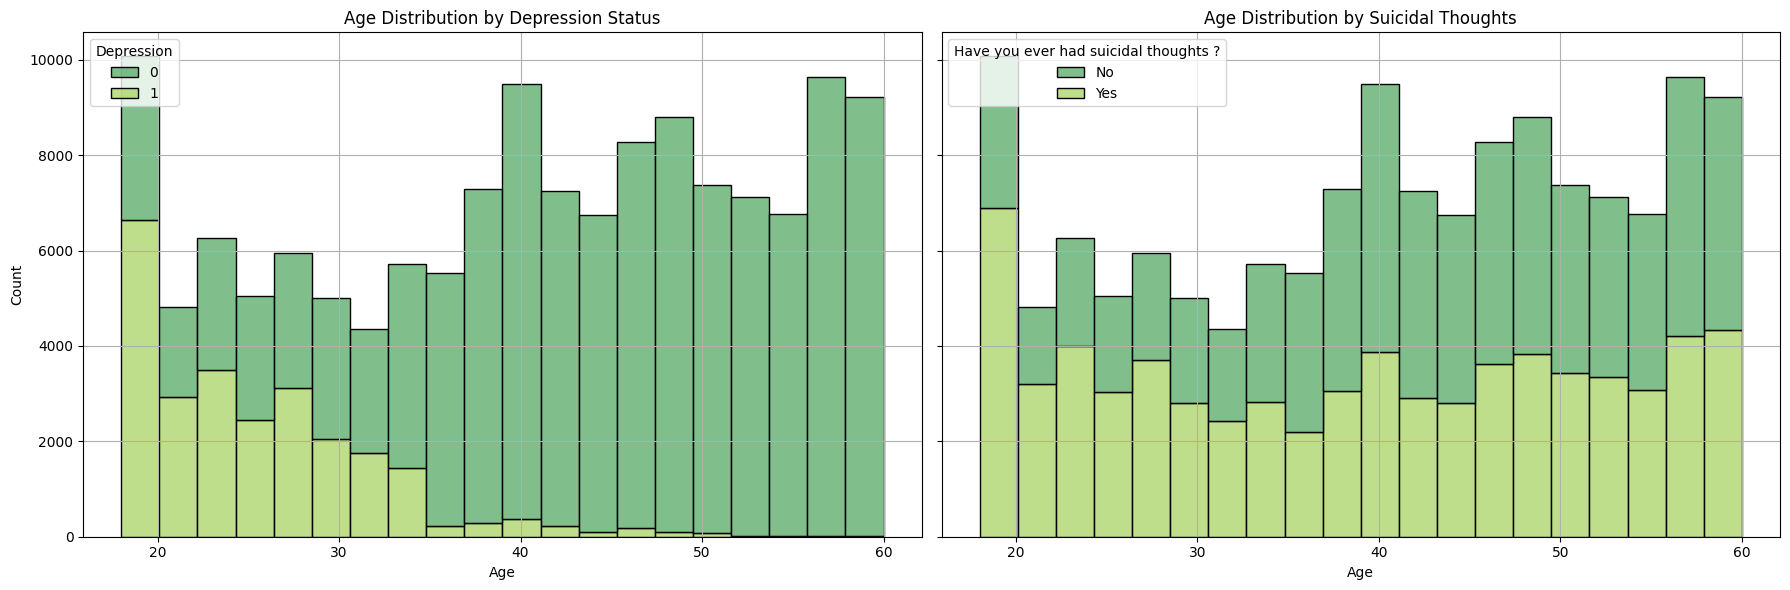

In [52]:
# Set up the subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Ï≤´ Î≤àÏß∏ Í∑∏ÎûòÌîÑ: Depression Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ïó∞Î†π Î∂ÑÌè¨
sns.histplot(data=train_original, x='Age', hue='Depression', multiple='stack',
             bins=20, edgecolor='black', palette='summer', ax=axes[0])
axes[0].set_title('Age Distribution by Depression Status')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].grid(True)

# Îëê Î≤àÏß∏ Í∑∏ÎûòÌîÑ: ÏûêÏÇ¥ ÏÉùÍ∞Å Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ïó∞Î†π Î∂ÑÌè¨
sns.histplot(data=train_original, x='Age', hue='Have you ever had suicidal thoughts ?',
             multiple='stack', bins=20, edgecolor='black', palette='summer', ax=axes[1])
axes[1].set_title('Age Distribution by Suicidal Thoughts')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('')  # sharey=True Ïù¥ÎØÄÎ°ú ÏÉùÎûµ Í∞ÄÎä•
axes[1].grid(True)

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.tight_layout()
plt.show()


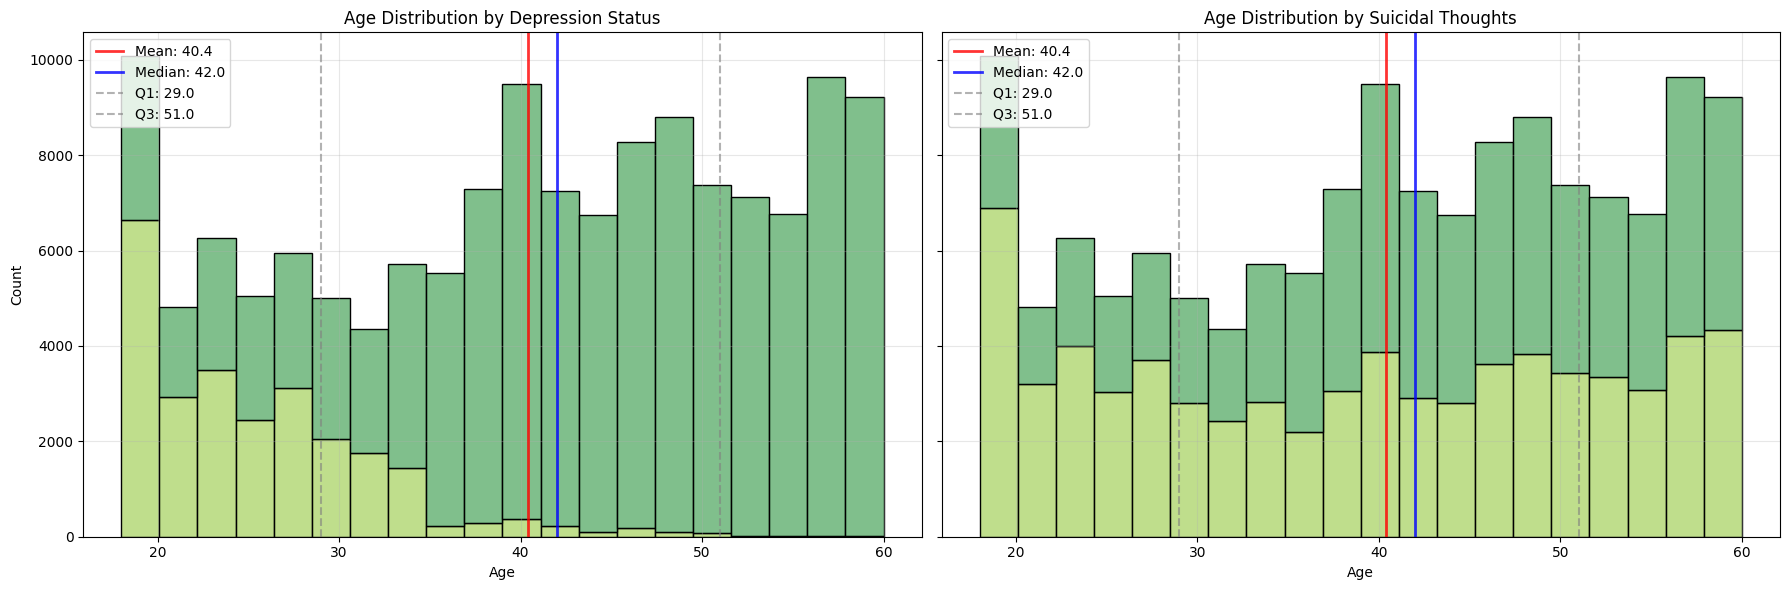

Ïó∞Î†π ÌÜµÍ≥Ñ:
ÌèâÍ∑†: 40.39ÏÑ∏
Ï§ëÏïôÍ∞í: 42.00ÏÑ∏
1ÏÇ¨Î∂ÑÏúÑÏàò: 29.00ÏÑ∏
3ÏÇ¨Î∂ÑÏúÑÏàò: 51.00ÏÑ∏


In [53]:
# Set up the subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Ï≤´ Î≤àÏß∏ Í∑∏ÎûòÌîÑ: Depression Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ïó∞Î†π Î∂ÑÌè¨
sns.histplot(data=train_original, x='Age', hue='Depression', multiple='stack',
             bins=20, edgecolor='black', palette='summer', ax=axes[0])

# ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÏùòÎØ∏ÏûàÎäî ÏÑ†Îì§ Ï∂îÍ∞Ä
age_mean = train_original['Age'].mean()
age_median = train_original['Age'].median()
age_q1 = train_original['Age'].quantile(0.25)
age_q3 = train_original['Age'].quantile(0.75)

# ÌèâÍ∑†ÏÑ† (Îπ®Í∞Ñ Ïã§ÏÑ†)
axes[0].axvline(age_mean, color='red', linestyle='-', linewidth=2, alpha=0.8, label=f'Mean: {age_mean:.1f}')
# Ï§ëÏïôÍ∞íÏÑ† (ÌååÎûÄ Ïã§ÏÑ†)
axes[0].axvline(age_median, color='blue', linestyle='-', linewidth=2, alpha=0.8, label=f'Median: {age_median:.1f}')
# ÏÇ¨Î∂ÑÏúÑÏàòÏÑ† (ÌöåÏÉâ Ï†êÏÑ†)
axes[0].axvline(age_q1, color='gray', linestyle='--', alpha=0.6, label=f'Q1: {age_q1:.1f}')
axes[0].axvline(age_q3, color='gray', linestyle='--', alpha=0.6, label=f'Q3: {age_q3:.1f}')

axes[0].set_title('Age Distribution by Depression Status')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].legend()
axes[0].grid(True, alpha=0.3)  # Í≤©ÏûêÎäî Ïó∞ÌïòÍ≤å

# Îëê Î≤àÏß∏ Í∑∏ÎûòÌîÑ: ÏûêÏÇ¥ ÏÉùÍ∞Å Ïó¨Î∂ÄÏóê Îî∞Î•∏ Ïó∞Î†π Î∂ÑÌè¨
sns.histplot(data=train_original, x='Age', hue='Have you ever had suicidal thoughts ?',
             multiple='stack', bins=20, edgecolor='black', palette='summer', ax=axes[1])

# ÎèôÏùºÌïú ÌÜµÍ≥ÑÏÑ†Îì§ Ï∂îÍ∞Ä
axes[1].axvline(age_mean, color='red', linestyle='-', linewidth=2, alpha=0.8, label=f'Mean: {age_mean:.1f}')
axes[1].axvline(age_median, color='blue', linestyle='-', linewidth=2, alpha=0.8, label=f'Median: {age_median:.1f}')
axes[1].axvline(age_q1, color='gray', linestyle='--', alpha=0.6, label=f'Q1: {age_q1:.1f}')
axes[1].axvline(age_q3, color='gray', linestyle='--', alpha=0.6, label=f'Q3: {age_q3:.1f}')

axes[1].set_title('Age Distribution by Suicidal Thoughts')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ÌÜµÍ≥Ñ Ï†ïÎ≥¥ Ï∂úÎ†•
print(f"Ïó∞Î†π ÌÜµÍ≥Ñ:")
print(f"ÌèâÍ∑†: {age_mean:.2f}ÏÑ∏")
print(f"Ï§ëÏïôÍ∞í: {age_median:.2f}ÏÑ∏")
print(f"1ÏÇ¨Î∂ÑÏúÑÏàò: {age_q1:.2f}ÏÑ∏")
print(f"3ÏÇ¨Î∂ÑÏúÑÏàò: {age_q3:.2f}ÏÑ∏")

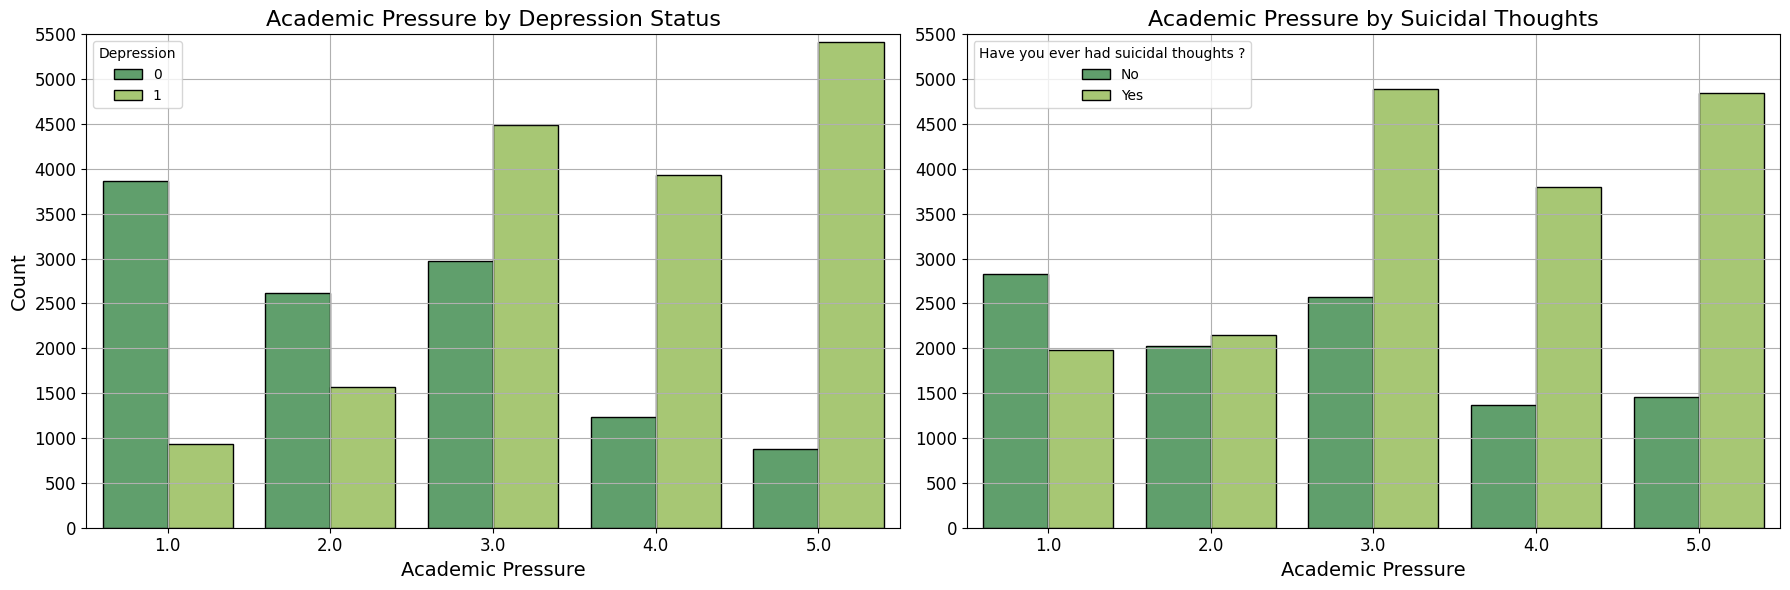

In [54]:
# Set up the plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Í≥µÌÜµ ÏÑ§Ï†ï
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12
ytick_step = 500  # ‚úÖ yÏ∂ï Îã®ÏúÑ

# Ï≤´ Î≤àÏß∏ Í∑∏ÎûòÌîÑ: Ïö∞Ïö∏ Ïó¨Î∂Ä
sns.countplot(data=train_original, x='Academic Pressure', hue='Depression',
              edgecolor='black', palette='summer', ax=axes[0])
axes[0].set_title('Academic Pressure by Depression Status', fontsize=title_fontsize)
axes[0].set_xlabel('Academic Pressure', fontsize=label_fontsize)
axes[0].set_ylabel('Count', fontsize=label_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].grid(True)

# Îëê Î≤àÏß∏ Í∑∏ÎûòÌîÑ: ÏûêÏÇ¥ ÏÉùÍ∞Å Ïó¨Î∂Ä
sns.countplot(data=train_original, x='Academic Pressure', hue='Have you ever had suicidal thoughts ?',
              edgecolor='black', palette='summer', ax=axes[1])
axes[1].set_title('Academic Pressure by Suicidal Thoughts', fontsize=title_fontsize)
axes[1].set_xlabel('Academic Pressure', fontsize=label_fontsize)
axes[1].set_ylabel('', fontsize=label_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].grid(True)

# ‚úÖ Îëê Í∑∏ÎûòÌîÑÏùò ÏµúÎåìÍ∞íÏùÑ Î™®Îëê Í≥†Î†§Ìï¥ÏÑú Í≥µÌÜµ Ïä§ÏºÄÏùº ÏÑ§Ï†ï
ymax0 = max([patch.get_height() for patch in axes[0].patches])
ymax1 = max([patch.get_height() for patch in axes[1].patches])
ymax_common = max(ymax0, ymax1)  # Îçî ÌÅ∞ Í∞í ÏÑ†ÌÉù
ymax_common = int(np.ceil(ymax_common / ytick_step)) * ytick_step

# Îëê Í∑∏ÎûòÌîÑ Î™®Îëê ÎèôÏùºÌïú yÏ∂ï Î≤îÏúÑ Ï†ÅÏö©
for ax in axes:
    ax.set_ylim(0, ymax_common)
    ax.set_yticks(np.arange(0, ymax_common + 1, ytick_step))
    ax.tick_params(axis='y', labelsize=tick_fontsize)

# Î†àÏù¥ÏïÑÏõÉ Ï†ïÎ¶¨
plt.tight_layout()
plt.show()

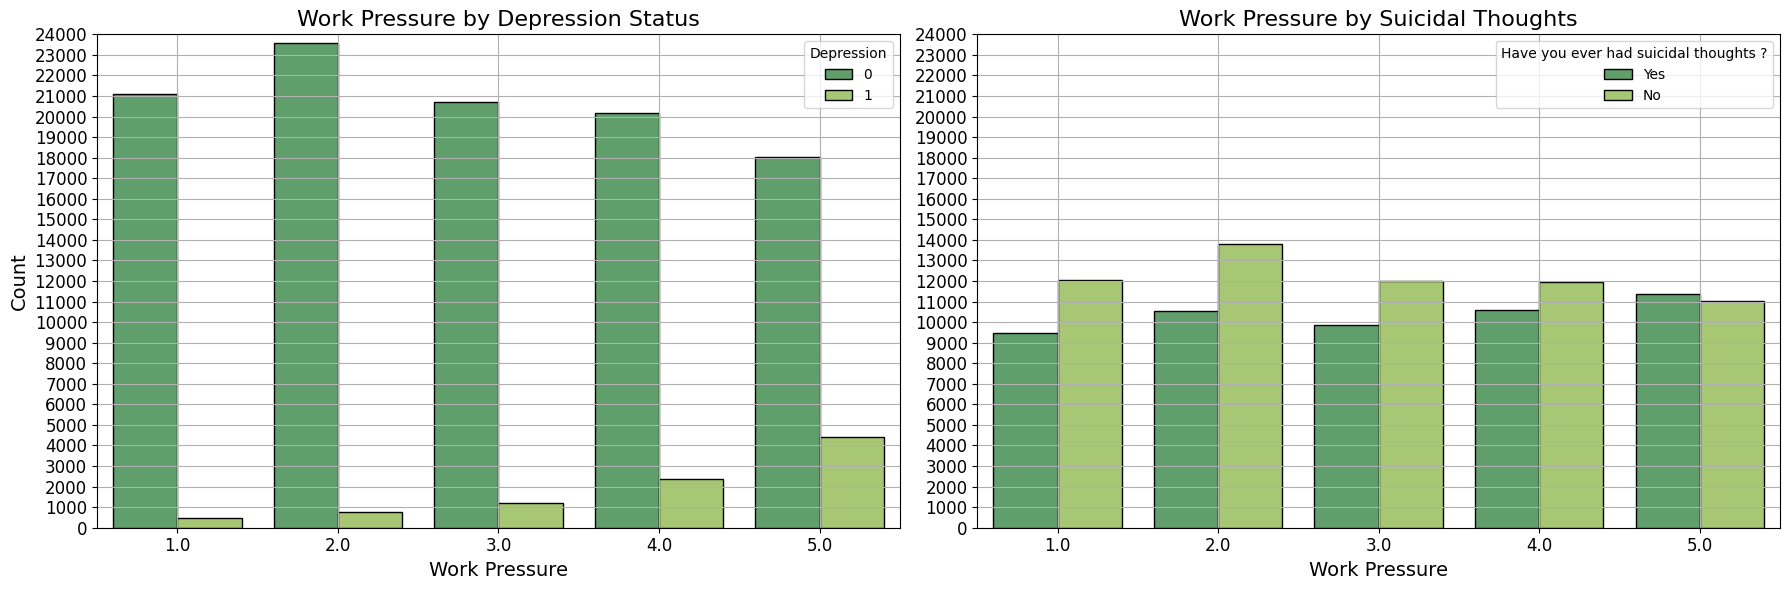

In [55]:
# Set up the plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Í≥µÌÜµ ÏÑ§Ï†ï
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12
ytick_step = 1000  # ‚úÖ yÏ∂ï Îã®ÏúÑ

# Ï≤´ Î≤àÏß∏ Í∑∏ÎûòÌîÑ: Ïö∞Ïö∏ Ïó¨Î∂Ä
sns.countplot(data=train_original, x='Work Pressure', hue='Depression',
              edgecolor='black', palette='summer', ax=axes[0])
axes[0].set_title('Work Pressure by Depression Status', fontsize=title_fontsize)
axes[0].set_xlabel('Work Pressure', fontsize=label_fontsize)
axes[0].set_ylabel('Count', fontsize=label_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].grid(True)

# Îëê Î≤àÏß∏ Í∑∏ÎûòÌîÑ: ÏûêÏÇ¥ ÏÉùÍ∞Å Ïó¨Î∂Ä
sns.countplot(data=train_original, x='Work Pressure', hue='Have you ever had suicidal thoughts ?',
              edgecolor='black', palette='summer', ax=axes[1])
axes[1].set_title('Work Pressure by Suicidal Thoughts', fontsize=title_fontsize)
axes[1].set_xlabel('Work Pressure', fontsize=label_fontsize)
axes[1].set_ylabel('', fontsize=label_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].grid(True)

# ‚úÖ Îëê Í∑∏ÎûòÌîÑÏùò ÏµúÎåìÍ∞íÏùÑ Î™®Îëê Í≥†Î†§Ìï¥ÏÑú Í≥µÌÜµ Ïä§ÏºÄÏùº ÏÑ§Ï†ï
ymax0 = max([patch.get_height() for patch in axes[0].patches])
ymax1 = max([patch.get_height() for patch in axes[1].patches])
ymax_common = max(ymax0, ymax1)  # Îçî ÌÅ∞ Í∞í ÏÑ†ÌÉù
ymax_common = int(np.ceil(ymax_common / ytick_step)) * ytick_step

# Îëê Í∑∏ÎûòÌîÑ Î™®Îëê ÎèôÏùºÌïú yÏ∂ï Î≤îÏúÑ Ï†ÅÏö©
for ax in axes:
    ax.set_ylim(0, ymax_common)
    ax.set_yticks(np.arange(0, ymax_common + 1, ytick_step))
    ax.tick_params(axis='y', labelsize=tick_fontsize)

# Î†àÏù¥ÏïÑÏõÉ Ï†ïÎ¶¨
plt.tight_layout()
plt.show()

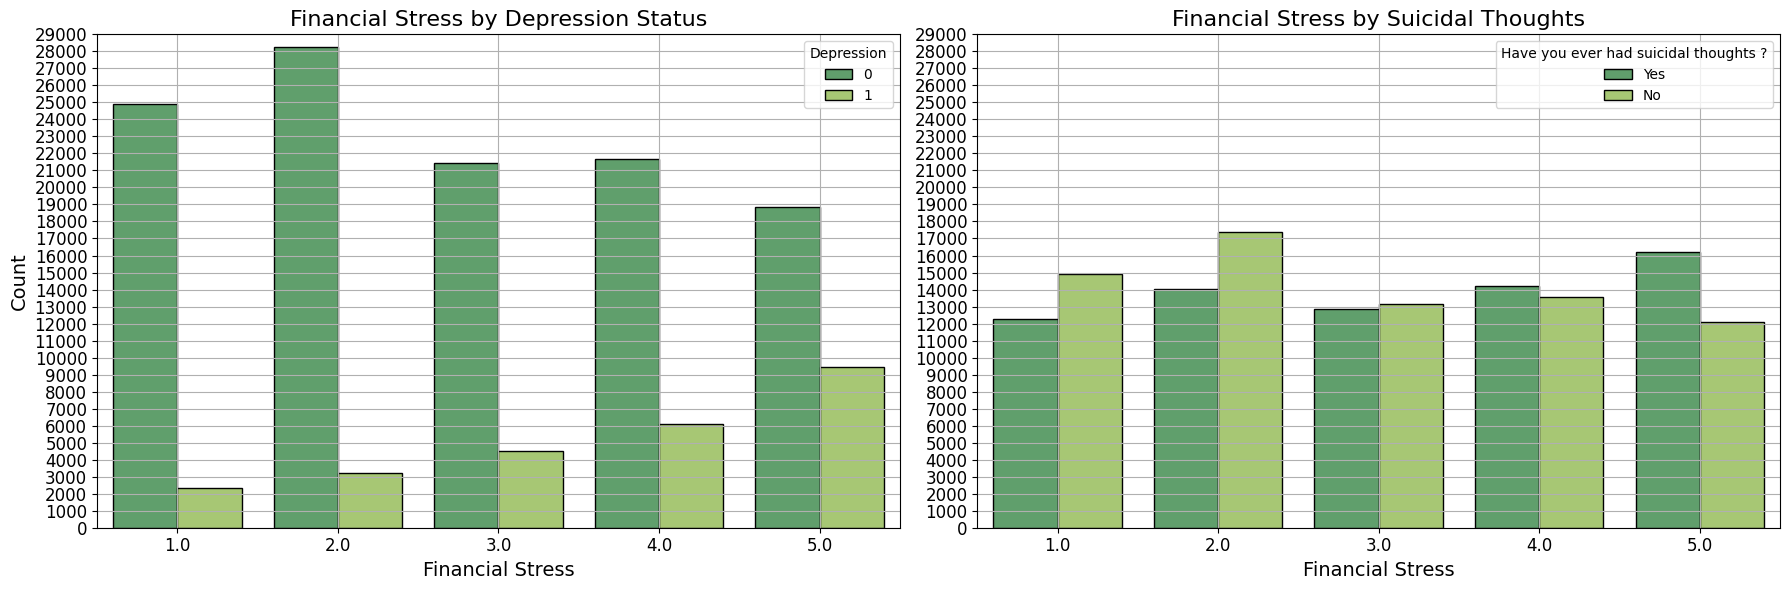

In [56]:
# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Í≥µÌÜµ ÏÑ§Ï†ïÍ∞í
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12
ytick_step = 1000

# Ï≤´ Î≤àÏß∏ Í∑∏ÎûòÌîÑ: Financial Stress vs Depression
sns.countplot(data=train_original, x='Financial Stress', hue='Depression',
              edgecolor='black', palette='summer', ax=axes[0])
axes[0].set_title('Financial Stress by Depression Status', fontsize=title_fontsize)
axes[0].set_xlabel('Financial Stress', fontsize=label_fontsize)
axes[0].set_ylabel('Count', fontsize=label_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].grid(True)

# Îëê Î≤àÏß∏ Í∑∏ÎûòÌîÑ: Financial Stress vs Suicidal Thoughts
sns.countplot(data=train_original, x='Financial Stress', hue='Have you ever had suicidal thoughts ?',
              edgecolor='black', palette='summer', ax=axes[1])
axes[1].set_title('Financial Stress by Suicidal Thoughts', fontsize=title_fontsize)
axes[1].set_xlabel('Financial Stress', fontsize=label_fontsize)
axes[1].set_ylabel('', fontsize=label_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].grid(True)

# ‚úÖ Îëê Í∑∏ÎûòÌîÑÏùò ÏµúÎåìÍ∞íÏùÑ Î™®Îëê Í≥†Î†§Ìï¥ÏÑú Í≥µÌÜµ Ïä§ÏºÄÏùº ÏÑ§Ï†ï
ymax0 = max([patch.get_height() for patch in axes[0].patches])
ymax1 = max([patch.get_height() for patch in axes[1].patches])
ymax_common = max(ymax0, ymax1)  # Îçî ÌÅ∞ Í∞í ÏÑ†ÌÉù
ymax_common = int(np.ceil(ymax_common / ytick_step)) * ytick_step

# Îëê Í∑∏ÎûòÌîÑ Î™®Îëê ÎèôÏùºÌïú yÏ∂ï Î≤îÏúÑ Ï†ÅÏö©
for ax in axes:
    ax.set_ylim(0, ymax_common)
    ax.set_yticks(np.arange(0, ymax_common + 1, ytick_step))
    ax.tick_params(axis='y', labelsize=tick_fontsize)

# Î†àÏù¥ÏïÑÏõÉ Ï†ïÎ¶¨
plt.tight_layout()
plt.show()

## 3.2. Sleep and dietary habits

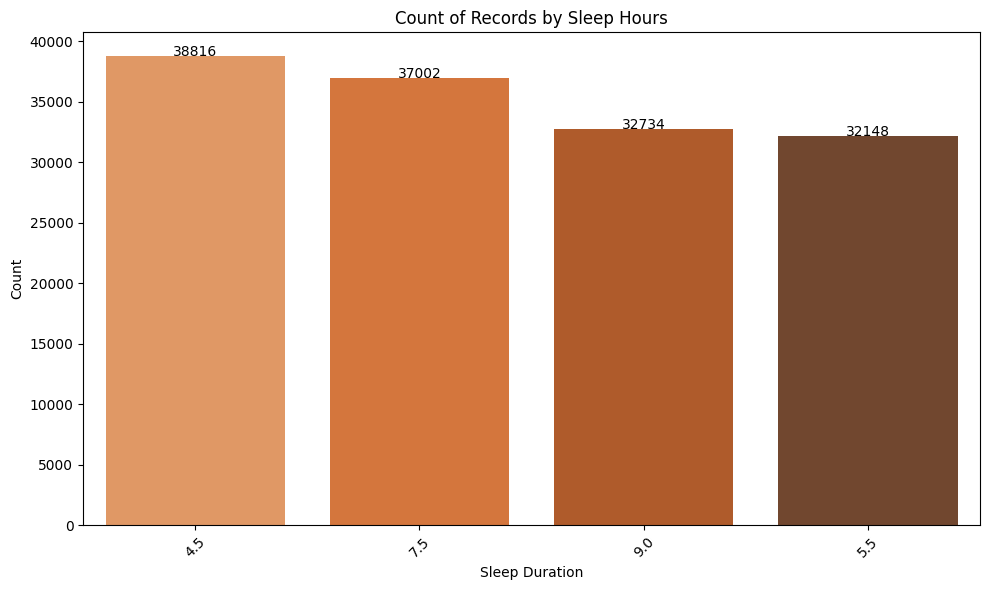

In [57]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=train_df,
                   x='Sleep Duration',
                   order=train_df['Sleep Duration'].value_counts().index,
                   palette='Oranges_d')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,  # ÎßâÎåÄÏùò Í∞ÄÏö¥Îç∞
            height + 1,                      # ÎßâÎåÄ ÏúÑÏóê ÏÇ¥Ïßù ÎùÑÏö∞Í∏∞
            int(height),                     # Ï†ïÏàòÌòïÏúºÎ°ú ÌëúÏãú
            ha="center", fontsize=10)

plt.title('Count of Records by Sleep Hours')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

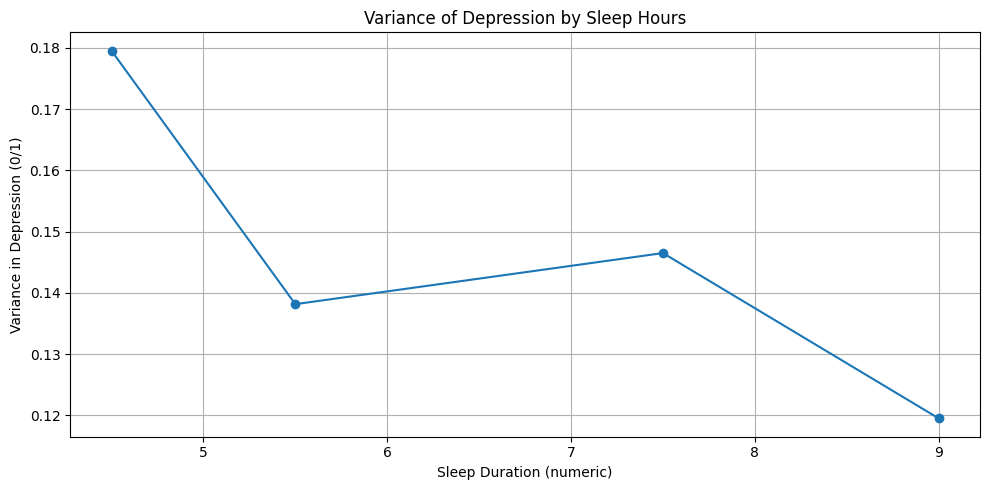

In [58]:
variance_by_sleep_num = train_df.groupby('Sleep Duration')['Depression'].var().sort_index()
plt.figure(figsize=(10, 5))
variance_by_sleep_num.plot(marker='o')
plt.title('Variance of Depression by Sleep Hours')
plt.xlabel('Sleep Duration (numeric)')
plt.ylabel('Variance in Depression (0/1)')
plt.grid(True)
plt.tight_layout()
plt.show()

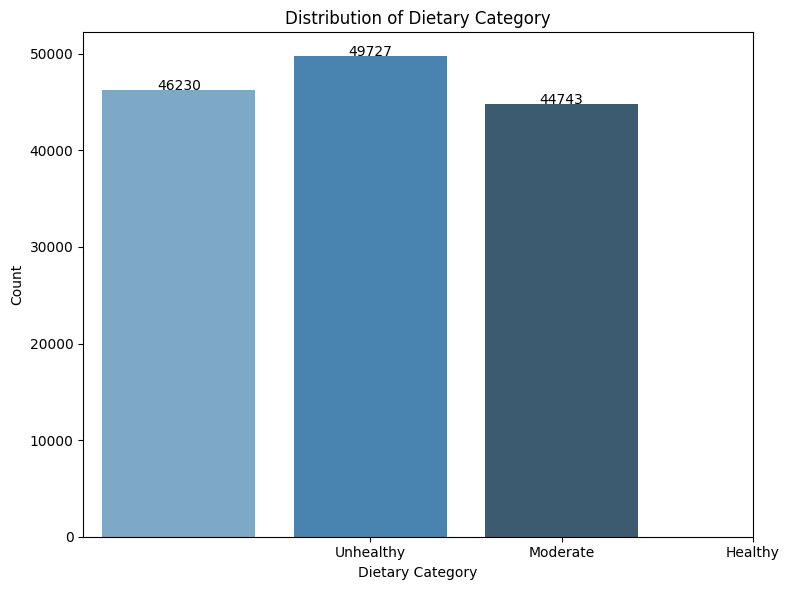

In [59]:
# prompt: Dietary_Category Î∂ÑÌè¨

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=train_df, x='Dietary_Category', palette='Blues_d')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            int(height),
            ha="center", fontsize=10)

plt.title('Distribution of Dietary Category')
plt.xlabel('Dietary Category')
plt.ylabel('Count')
plt.xticks(ticks=[1, 2, 3], labels=['Unhealthy', 'Moderate', 'Healthy']) # Assuming 1: Unhealthy, 2: Moderate, 3: Healthy based on the mapping
plt.tight_layout()
plt.show()

Proportion of Depression by Dietary Category:
   Dietary_Category  Depression_Proportion
0               1.0               0.260545
1               2.0               0.165725
2               3.0               0.118030


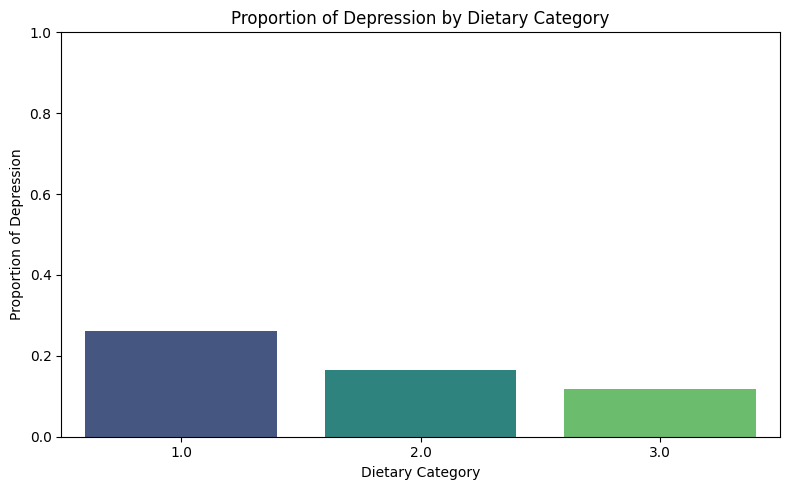

In [60]:
# Group by 'Dietary_Category' and calculate the mean of 'Depression' (which represents the proportion)
depression_proportion_by_diet = train_df.groupby('Dietary_Category')['Depression'].mean().reset_index()

# Rename the 'Depression' column to make it clearer that it's a proportion
depression_proportion_by_diet = depression_proportion_by_diet.rename(columns={'Depression': 'Depression_Proportion'})

print("Proportion of Depression by Dietary Category:")
print(depression_proportion_by_diet)

# Visualize the proportion
plt.figure(figsize=(8, 5))
sns.barplot(x='Dietary_Category', y='Depression_Proportion', data=depression_proportion_by_diet, palette='viridis')
plt.title('Proportion of Depression by Dietary Category')
plt.xlabel('Dietary Category')
plt.ylabel('Proportion of Depression')
plt.ylim(0, 1) # Ensure the y-axis is between 0 and 1 for proportion
plt.tight_layout()
plt.show()

In [61]:
df_ = train_df[['Sleep Hours', 'Dietary_Category', 'Depression']].dropna()

# Sleep HoursÎ•º Ï†ïÏàòÎ°ú Î∞òÏò¨Î¶ºÌïòÏó¨ Í∑∏Î£πÌôî (Ïòà: 6.5 ‚Üí 6)
df_['Sleep_Hour_Int'] = df_['Sleep Hours'].round().astype(int)

# Í∑∏Î£πÎ≥Ñ Ïö∞Ïö∏Ï¶ù ÎπÑÏú® Í≥ÑÏÇ∞
grouped = df_.groupby(['Sleep_Hour_Int', 'Dietary_Category'])['Depression'].mean().reset_index()
grouped.rename(columns={'Depression': 'Depression_Rate'}, inplace=True)

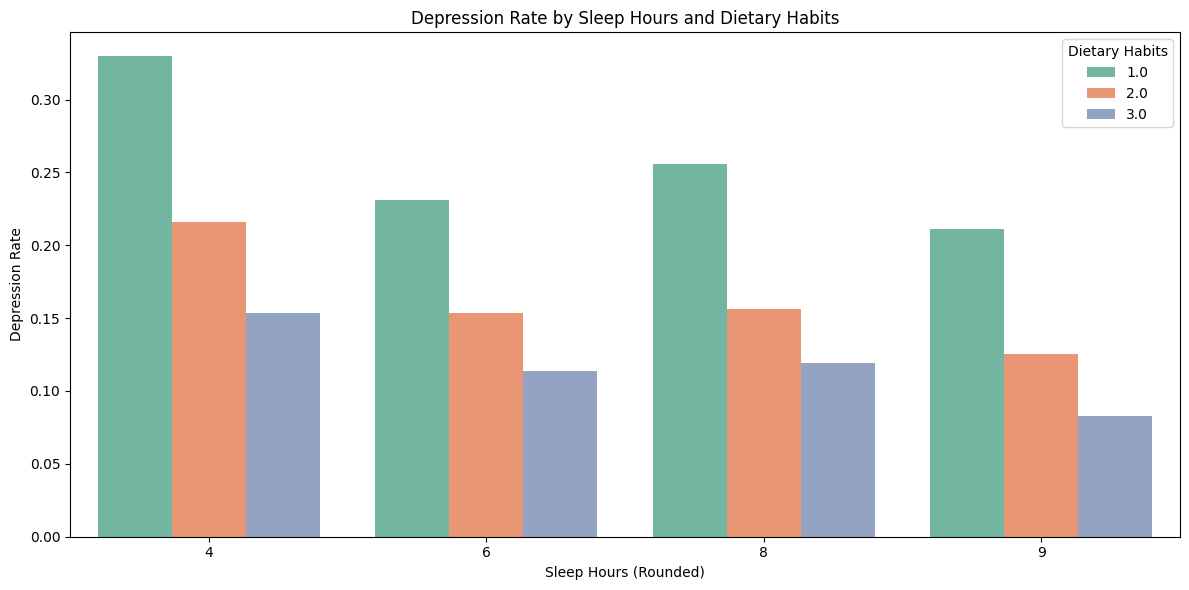

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(data=grouped,
            x='Sleep_Hour_Int',
            y='Depression_Rate',
            hue='Dietary_Category',
            palette='Set2')

plt.title('Depression Rate by Sleep Hours and Dietary Habits')
plt.xlabel('Sleep Hours (Rounded)')
plt.ylabel('Depression Rate')
plt.legend(title='Dietary Habits')
plt.tight_layout()
plt.show()

## 3.3. cities and professions

--- ÌïôÏÉù ÏàòÍ∞Ä 100Î™Ö ÎÑòÎäî ÎèÑÏãúÎ≥Ñ ÌÜµÍ≥Ñ ---
             City  Total_Count  Student_Count  Student_Ratio
17      Hyderabad         4496           1340       0.298043
10       Srinagar         5074           1372       0.270398
21        Lucknow         4280           1155       0.269860
27         Bhopal         3475            934       0.268777
20          Thane         4289           1139       0.265563
19         Jaipur         4328           1036       0.239372
0          Kalyan         6591           1570       0.238204
13           Agra         4684           1094       0.233561
14          Surat         4636           1078       0.232528
2     Vasai-Virar         5765           1290       0.223764
24        Chennai         4044            885       0.218843
26          Delhi         3593            768       0.213749
6        Ludhiana         5226           1111       0.212591
25      Ghaziabad         3620            745       0.205801
3         Kolkata         5689  

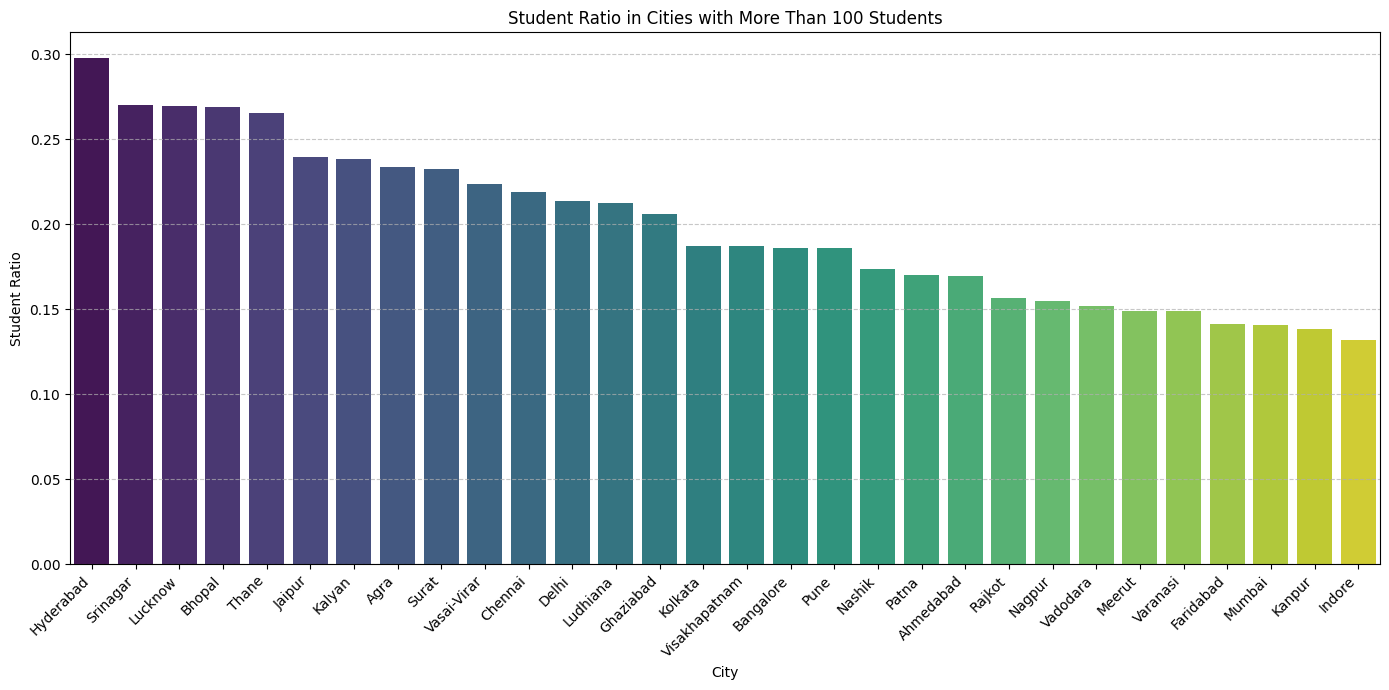

In [63]:
# 1. ÎèÑÏãúÎ≥Ñ Ï†ÑÏ≤¥ Í∞úÏ≤¥ Ïàò Í≥ÑÏÇ∞
city_total_counts = train_df['City'].value_counts().reset_index()
city_total_counts.columns = ['City', 'Total_Count']

# 2. ÎèÑÏãúÎ≥Ñ ÌïôÏÉù Ïàò Í≥ÑÏÇ∞
# 'Working Professional or Student'Í∞Ä 'Student'Ïù∏ Í≤ΩÏö∞Îßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÎèÑÏãúÎ≥Ñ Ïπ¥Ïö¥Ìä∏ Í≥ÑÏÇ∞
student_counts = train_df[train_df['Working Professional or Student'] == 'Student']['City'].value_counts().reset_index()
student_counts.columns = ['City', 'Student_Count']

# 3. Ï†ÑÏ≤¥ Ïπ¥Ïö¥Ìä∏ÏôÄ ÌïôÏÉù Ïàò Ïπ¥Ïö¥Ìä∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÎèÑÏãúÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
city_stats = pd.merge(city_total_counts, student_counts, on='City', how='left')

# ÌïôÏÉù ÏàòÍ∞Ä ÏóÜÎäî ÎèÑÏãúÎäî Î≥ëÌï© ÌõÑ Student_CountÍ∞Ä NaNÏù¥ ÎêòÎØÄÎ°ú 0ÏúºÎ°ú Ï±ÑÏõåÏ§çÎãàÎã§.
city_stats['Student_Count'] = city_stats['Student_Count'].fillna(0).astype(int)

# 4. ÌïôÏÉù ÎπÑÏú® Í≥ÑÏÇ∞
city_stats['Student_Ratio'] = city_stats['Student_Count'] / city_stats['Total_Count']

# 5. ÌïôÏÉù ÏàòÍ∞Ä 100Î™ÖÏùÑ ÎÑòÎäî ÎèÑÏãúÎßå ÌïÑÌÑ∞ÎßÅ
filtered_city_stats = city_stats[city_stats['Student_Count'] > 100].sort_values(by='Student_Ratio', ascending=False)


print("--- ÌïôÏÉù ÏàòÍ∞Ä 100Î™Ö ÎÑòÎäî ÎèÑÏãúÎ≥Ñ ÌÜµÍ≥Ñ ---")
print(filtered_city_stats)
print("-" * 30)


# 6. ÌïÑÌÑ∞ÎßÅÎêú ÎèÑÏãúÏùò ÌïôÏÉù ÎπÑÏú® ÏãúÍ∞ÅÌôî (ÎßâÎåÄ Í∑∏ÎûòÌîÑ)
if not filtered_city_stats.empty:
    plt.figure(figsize=(14, 7)) # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï (ÌïÑÌÑ∞ÎßÅÎêú ÎèÑÏãú ÏàòÏóê Îî∞Îùº Ï°∞Ï†à)
    # ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
    sns.barplot(data=filtered_city_stats, x='City', y='Student_Ratio', palette='viridis')

    plt.title('Student Ratio in Cities with More Than 100 Students') # Í∑∏ÎûòÌîÑ Ï†úÎ™© ÏÑ§Ï†ï
    plt.xlabel('City') # xÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
    plt.ylabel('Student Ratio') # yÏ∂ï Î†àÏù¥Î∏î ÏÑ§Ï†ï
    plt.xticks(rotation=45, ha='right') # ÎèÑÏãú Ïù¥Î¶ÑÏù¥ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÌöåÏ†Ñ
    plt.grid(axis='y', linestyle='--', alpha=0.7) # yÏ∂ï Í∑∏Î¶¨Îìú Ï∂îÍ∞Ä
    plt.tight_layout() # Í∑∏ÎûòÌîÑ Ïó¨Î∞± ÏûêÎèô Ï°∞Ï†à
    plt.show()
else:
    print("ÌïôÏÉù ÏàòÍ∞Ä 100Î™ÖÏùÑ ÎÑòÎäî ÎèÑÏãúÍ∞Ä ÏóÜÏäµÎãàÎã§.")

--- ÌïôÏÉù ÏàòÍ∞Ä 100Î™Ö ÎÑòÎäî ÎèÑÏãúÎ≥Ñ ÌïôÏÉù ÎπÑÏú® Î∞è Ïö∞Ïö∏Ï¶ù ÎπÑÏú® ---
             City  Student_Ratio  Student_Count  Depression_Ratio
0          Kalyan       0.238204           1570          0.199666
1           Patna       0.169986           1007          0.163234
2     Vasai-Virar       0.223764           1290          0.197918
3         Kolkata       0.187379           1066          0.173668
4       Ahmedabad       0.169428            951          0.217887
5          Meerut       0.149240            825          0.134045
6        Ludhiana       0.212591           1111          0.192690
7            Pune       0.185797            968          0.161036
8          Rajkot       0.156712            816          0.173228
9   Visakhapatnam       0.187210            969          0.159196
10       Srinagar       0.270398           1372          0.211667
11         Mumbai       0.140757            699          0.131293
12         Indore       0.131979            643          0.16

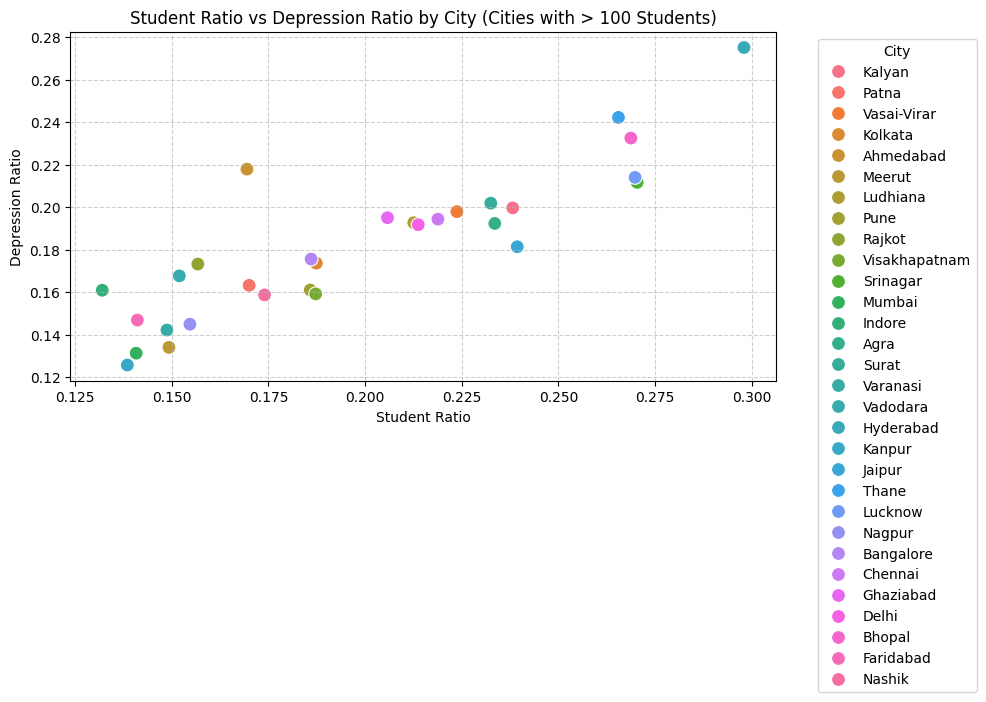

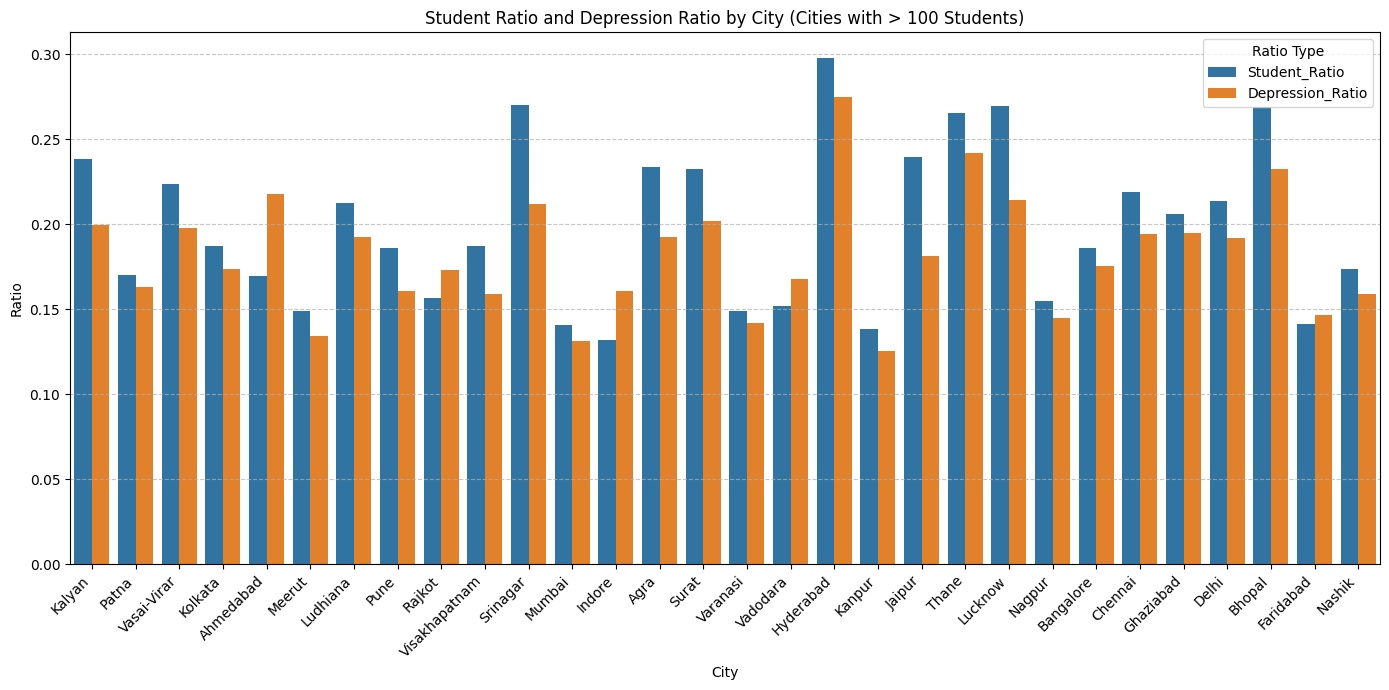

In [64]:
# 1. ÎèÑÏãúÎ≥Ñ Ï†ÑÏ≤¥ Í∞úÏ≤¥ Ïàò Í≥ÑÏÇ∞ (ÏïûÏÑú Í≥ÑÏÇ∞Ìïú city_total_counts Ïû¨ÏÇ¨Ïö©)
city_total_counts = train_df['City'].value_counts().reset_index()
city_total_counts.columns = ['City', 'Total_Count']

# 2. ÎèÑÏãúÎ≥Ñ Ïö∞Ïö∏Ï¶ù ÏûàÎäî Í∞úÏ≤¥ Ïàò Í≥ÑÏÇ∞
# 'Depression'Ïù¥ 1Ïù∏ Í≤ΩÏö∞Îßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÎèÑÏãúÎ≥Ñ Ïπ¥Ïö¥Ìä∏ Í≥ÑÏÇ∞
depressed_counts = train_df[train_df['Depression'] == 1]['City'].value_counts().reset_index()
depressed_counts.columns = ['City', 'Depressed_Count']

# 3. ÎèÑÏãúÎ≥Ñ Ï†ÑÏ≤¥ ÌÜµÍ≥ÑÏôÄ Ïö∞Ïö∏Ï¶ù ÌÜµÍ≥Ñ Î≥ëÌï©
city_depression_stats = pd.merge(city_total_counts, depressed_counts, on='City', how='left')

# Ïö∞Ïö∏Ï¶ù ÏûàÎäî Í∞úÏ≤¥Í∞Ä ÏóÜÎäî ÎèÑÏãúÎäî Î≥ëÌï© ÌõÑ Depressed_CountÍ∞Ä NaNÏù¥ ÎêòÎØÄÎ°ú 0ÏúºÎ°ú Ï±ÑÏõåÏ§çÎãàÎã§.
city_depression_stats['Depressed_Count'] = city_depression_stats['Depressed_Count'].fillna(0).astype(int)

# 4. ÎèÑÏãúÎ≥Ñ Ïö∞Ïö∏Ï¶ù ÎπÑÏú® Í≥ÑÏÇ∞
city_depression_stats['Depression_Ratio'] = city_depression_stats['Depressed_Count'] / city_depression_stats['Total_Count']

# 5. Í∏∞Ï°¥Ïóê Í≥ÑÏÇ∞Ìïú ÎèÑÏãúÎ≥Ñ ÌïôÏÉù ÎπÑÏú® Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥ëÌï©
# ÏïûÏÑú "ÌïôÏÉù ÏàòÍ∞Ä 100Î™Ö ÎÑòÎäî ÎèÑÏãúÎ≥Ñ ÌïôÏÉù ÎπÑÏú® ÏãúÍ∞ÅÌôî" ÏΩîÎìúÏóêÏÑú Í≥ÑÏÇ∞Ìïú city_stats DataFrameÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# ÎßåÏïΩ city_stats DataFrameÏù¥ ÏóÜÎã§Î©¥, Ìï¥Îãπ ÏΩîÎìúÎ•º Î®ºÏ†Ä Ïã§ÌñâÌïòÏó¨ city_statsÎ•º ÏÉùÏÑ±Ìï¥Ïïº Ìï©ÎãàÎã§.
# Ïó¨Í∏∞ÏÑúÎäî city_stats DataFrameÏóê Ïù¥ÎØ∏ 'City', 'Total_Count', 'Student_Count', 'Student_Ratio' Ïª¨ÎüºÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.

# ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌïòÏó¨ Î≥ëÌï©
# city_statsÎäî Ï†ÑÏ≤¥ ÎèÑÏãú Ï†ïÎ≥¥Î•º Ìè¨Ìï®ÌïòÍ≥† ÏûàÏúºÎØÄÎ°ú, Ï†ÑÏ≤¥ ÎèÑÏãúÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©Ìï©ÎãàÎã§.
# ÌïôÏÉù ÎπÑÏú®Ïù¥ 100Î™Ö ÎÑòÎäî ÎèÑÏãú ÌïÑÌÑ∞ÎßÅÏùÄ ÏãúÍ∞ÅÌôî Îã®Í≥ÑÏóêÏÑú ÏàòÌñâÌï©ÎãàÎã§.
city_combined_stats = pd.merge(city_stats[['City', 'Student_Ratio', 'Student_Count']],
                               city_depression_stats[['City', 'Depression_Ratio']],
                               on='City',
                               how='inner') # Îëê Îç∞Ïù¥ÌÑ∞ Î™®ÎëêÏóê ÏûàÎäî ÎèÑÏãúÎßå ÏÑ†ÌÉù

# ÌïôÏÉù ÏàòÍ∞Ä 100Î™ÖÏùÑ ÎÑòÎäî ÎèÑÏãúÎßå ÌïÑÌÑ∞ÎßÅ
filtered_city_combined_stats = city_combined_stats[city_combined_stats['Student_Count'] > 100].copy()

print("--- ÌïôÏÉù ÏàòÍ∞Ä 100Î™Ö ÎÑòÎäî ÎèÑÏãúÎ≥Ñ ÌïôÏÉù ÎπÑÏú® Î∞è Ïö∞Ïö∏Ï¶ù ÎπÑÏú® ---")
print(filtered_city_combined_stats)
print("-" * 30)


# 6. ÏãúÍ∞ÅÌôî

# ÏãúÍ∞ÅÌôî Î∞©Î≤ï 1: ÏÇ∞Ï†êÎèÑ (Scatter Plot)
if not filtered_city_combined_stats.empty:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_city_combined_stats,
                    x='Student_Ratio',
                    y='Depression_Ratio',
                    hue='City', # ÎèÑÏãúÎ≥ÑÎ°ú ÏÉâÏÉÅ Íµ¨Î∂Ñ (ÎèÑÏãúÍ∞Ä ÎßéÏúºÎ©¥ ÎπÑÌö®Ïú®Ï†ÅÏùº Ïàò ÏûàÏùå)
                    s=100) # Ï†ê ÌÅ¨Í∏∞ ÏÑ§Ï†ï

    # ÎèÑÏãú Ïù¥Î¶Ñ ÌëúÏãú (ÏÑ†ÌÉù ÏÇ¨Ìï≠, ÎèÑÏãúÍ∞Ä ÎßéÏúºÎ©¥ Í≤πÏπ† Ïàò ÏûàÏùå)
    # for i in range(len(filtered_city_combined_stats)):
    #     plt.text(filtered_city_combined_stats['Student_Ratio'].iloc[i] + 0.01,
    #              filtered_city_combined_stats['Depression_Ratio'].iloc[i],
    #              filtered_city_combined_stats['City'].iloc[i],
    #              fontsize=9)

    plt.title('Student Ratio vs Depression Ratio by City (Cities with > 100 Students)')
    plt.xlabel('Student Ratio')
    plt.ylabel('Depression Ratio')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left') # Î≤îÎ°Ä ÏúÑÏπò Ï°∞Ï†ï
    plt.tight_layout()
    plt.show()
else:
     print("ÌïôÏÉù ÏàòÍ∞Ä 100Î™ÖÏùÑ ÎÑòÎäî ÎèÑÏãúÍ∞Ä ÏóÜÏäµÎãàÎã§.")


# ÏãúÍ∞ÅÌôî Î∞©Î≤ï 2: Í≤∞Ìï©Îêú ÎßâÎåÄ Í∑∏ÎûòÌîÑ (Dual Axis Bar Plot ÎòêÎäî Grouped Bar Plot)
# Îëê Î≥ÄÏàòÏùò Ïä§ÏºÄÏùºÏù¥ 0-1Î°ú ÎèôÏùºÌïòÎØÄÎ°ú Grouped Bar PlotÏù¥ Ï†ÅÌï©Ìï©ÎãàÎã§.

if not filtered_city_combined_stats.empty:
    # Îç∞Ïù¥ÌÑ∞Î•º meltÌïòÏó¨ seabornÏùò barplotÏúºÎ°ú Í∑∏Î£πÌôîÌïòÍ∏∞ ÏâΩÍ≤å ÎßåÎì≠ÎãàÎã§.
    df_melted = filtered_city_combined_stats.melt(id_vars=['City'],
                                                  value_vars=['Student_Ratio', 'Depression_Ratio'],
                                                  var_name='Ratio_Type',
                                                  value_name='Ratio_Value')

    plt.figure(figsize=(14, 7))
    sns.barplot(data=df_melted,
                x='City',
                y='Ratio_Value',
                hue='Ratio_Type', # ÌïôÏÉù ÎπÑÏú® vs Ïö∞Ïö∏Ï¶ù ÎπÑÏú®Î°ú Í∑∏Î£πÌôî
                palette='tab10') # Îã§Î•∏ ÏÉâÏÉÅ ÌåîÎ†àÌä∏ ÏÇ¨Ïö© ÏòàÏãú

    plt.title('Student Ratio and Depression Ratio by City (Cities with > 100 Students)')
    plt.xlabel('City')
    plt.ylabel('Ratio')
    plt.xticks(rotation=45, ha='right') # ÎèÑÏãú Ïù¥Î¶ÑÏù¥ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÌöåÏ†Ñ
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Ratio Type')
    plt.tight_layout()
    plt.show()
else:
    print("ÌïôÏÉù ÏàòÍ∞Ä 100Î™ÖÏùÑ ÎÑòÎäî ÎèÑÏãúÍ∞Ä ÏóÜÏäµÎãàÎã§.")

In [65]:
df_students = train_df[train_df['Working Professional or Student'] == 'Student'].copy()
df_students

id       Name  Gender  Age           City  \
2            2     Yuvraj    Male    4  Visakhapatnam   
8            8  Aishwarya  Female    2      Bangalore   
26          26     Aditya    Male    4       Srinagar   
30          30     Prisha  Female    3       Varanasi   
32          32     Chhavi  Female    2         Jaipur   
...        ...        ...     ...  ...            ...   
140685  140685   Aaradhya  Female    3          Surat   
140686  140686      Rohan    Male    3       Ludhiana   
140689  140689      Ayaan    Male    4      Faridabad   
140690  140690      Rashi  Female    1       Ludhiana   
140699  140699        Sai    Male    3          Patna   

       Working Professional or Student  Profession  Academic Pressure  \
2                              Student           0                5.0   
8                              Student           0                2.0   
26                             Student           0                3.0   
30                             Student           0                3.0   
32                             Student           0                4.0   
...                                ...         ...                ...   
140685                         Student           0                5.0   
140686                         Student           0                2.0   
140689                         Student           0                3.0   
140690                         Student           0                5.0   
140699                         Student           0                4.0   

        Work Pressure  CGPA  ...  Depression  Female  Male Suicidal Thoughts  \
2                 NaN     8  ...           1       0     1                 1   
8                 NaN     5  ...           0       1     0                 0   
26                NaN     7  ...           0       0     1                 0   
30                NaN     5  ...           1       1     0                 1   
32                NaN     8  ...           0       1     0                 1   
...               ...   ...  ...         ...     ...   ...               ...   
140685            NaN     5  ...           0       1     0                 1   
140686            NaN     9  ...           0       0     1                 0   
140689            NaN     6  ...           0       0     1                 0   
140690            NaN     6  ...           1       1     0                 1   
140699            NaN     9  ...           1       0     1                 1   

        Working Professional Student  Sleep Hours  Dietary_Category  \
2                          0       1          5.5               3.0   
8                          0       1          5.5               2.0   
26                         0       1          4.5               3.0   
30                         0       1          7.5               2.0   
32                         0       1          5.5               2.0   
...                      ...     ...          ...               ...   
140685                     0       1          5.5               1.0   
140686                     0       1          4.5               3.0   
140689                     0       1          5.5               1.0   
140690                     0       1          4.5               3.0   
140699                     0       1          4.5               3.0   

        GreenSpace  PopulationDensity  
2             0.18             3900.0  
8             3.31             4381.0  
26            2.60             5283.0  
30           24.78             2367.0  
32            6.67             6491.0  
...            ...                ...  
140685        5.90            13600.0  
140686        0.80             9781.0  
140689        3.00             9233.0  
140690        0.80             9781.0  
140699        2.00            11667.0  

[27901 rows x 29 columns]

# 4. Feacture Engineering

In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 29 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  int64  
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             140700 non-null  int64  
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   140700 non-null  int64  
 10  Study Satisfaction                     27897 non-null   

In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  int64  
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             93800 non-null  int64  
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   93800 non-null  int64  
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [68]:
train_df = train_df.drop(columns=['Sleep Duration', 'Dietary Habits'])


In [69]:
test_df = test_df.drop(columns=['Sleep Duration', 'Dietary Habits'])

In [70]:
train_df = train_df.fillna(0)

In [71]:
test_df = test_df.fillna(0)

In [72]:
from category_encoders.target_encoder import TargetEncoder

# Feature Engineering
train_df['Age_WorkPressure'] = train_df['Age'] * train_df['Work Pressure']
test_df['Age_WorkPressure']  = test_df['Age'] * test_df['Work Pressure']

encoder = TargetEncoder(cols=['City', 'Profession'], handle_unknown='value', handle_missing='value')

train_df[['City_encoded', 'Profession_encoded']] = encoder.fit_transform(
    train_df[['City', 'Profession']],
    train_df['Depression']
)

test_df[['City_encoded', 'Profession_encoded']] = encoder.transform(
    test_df[['City', 'Profession']]
)

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 30 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  int64  
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             140700 non-null  int64  
 7   Academic Pressure                      140700 non-null  float64
 8   Work Pressure                          140700 non-null  float64
 9   CGPA                                   140700 non-null  int64  
 10  Study Satisfaction                     140700 non-null  

In [74]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  int64  
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             93800 non-null  int64  
 7   Academic Pressure                      93800 non-null  float64
 8   Work Pressure                          93800 non-null  float64
 9   CGPA                                   93800 non-null  int64  
 10  Study Satisfaction                     93800 non-null  float64
 11  Jo

In [75]:
# Save 'id' for submission
test_ids = test_df['id']

# Drop 'id'
train_df = train_df.drop(columns=['id'], errors='ignore')
test_df  = test_df.drop(columns=['id'], errors='ignore')

# Target
target_column = 'Depression'

# (ÏÑ†ÌÉù) ÌÉÄÍπÉÏùÑ Ïà´ÏûêÎ°ú Î≥¥Ïû•
import pandas as pd
train_df[target_column] = pd.to_numeric(train_df[target_column], errors='coerce')

# Ïª¨Îüº ÌÉÄÏûÖ Î∂ÑÎ¶¨ (train_df Í∏∞Ï§ÄÏúºÎ°ú!)
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_columns   = train_df.select_dtypes(exclude=['object']).columns.tolist()

# ÌÉÄÍπÉÏùÄ ÌîºÏ≤ò Î™©Î°ùÏóêÏÑú Ï†úÍ±∞(ÏóêÎü¨ ÏóÜÏù¥)
if target_column in numerical_columns:
    numerical_columns.remove(target_column)
if target_column in categorical_columns:
    categorical_columns.remove(target_column)

print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns)
print("\nNumerical Columns:", numerical_columns)

# Ïù¥ÌõÑ ÌîºÏ≤ò/ÌÉÄÍπÉ Î∂ÑÎ¶¨
X_train = train_df.drop(columns=[target_column], errors='ignore')
y_train = train_df[target_column]


Target Column: Depression

Categorical Columns: ['Name', 'Gender', 'City', 'Working Professional or Student', 'Have you ever had suicidal thoughts ?']

Numerical Columns: ['Age', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Degree', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Female', 'Male', 'Suicidal Thoughts', 'Working Professional', 'Student', 'Sleep Hours', 'Dietary_Category', 'GreenSpace', 'PopulationDensity', 'Age_WorkPressure', 'City_encoded', 'Profession_encoded']


In [76]:
train_df['Performance_Pressure'] = train_df['Work Pressure'] + train_df['Academic Pressure']
train_df['Performance_Satisfaction'] = train_df['Job Satisfaction'] + train_df['Study Satisfaction']

train_df.drop(['Work Pressure', 'Academic Pressure', 'Job Satisfaction', 'Study Satisfaction', 'Have you ever had suicidal thoughts ?'], axis=1, inplace=True)

In [77]:
test_df['Performance_Pressure'] = test_df['Work Pressure'] + test_df['Academic Pressure']
test_df['Performance_Satisfaction'] = test_df['Job Satisfaction'] + test_df['Study Satisfaction']

test_df.drop(['Work Pressure', 'Academic Pressure', 'Job Satisfaction', 'Study Satisfaction', 'Have you ever had suicidal thoughts ?'], axis=1, inplace=True)

# 5. Regressions

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train_df[[
    'Age', 'Profession', 'CGPA', 'Work/Study Hours',
    'Financial Stress', 'Working Professional', 'Student', 'Performance_Pressure', 'Performance_Satisfaction', 'Suicidal Thoughts', 'Depression'
]]

X = add_constant(X)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)
# VIFÍ∞Ä 10 Ïù¥ÏÉÅ ÌôïÏù∏ÎêòÎäî Í≤ΩÏö∞, Ïã¨Í∞ÅÌïú Îã§Ï§ëÍ≥µÏÑ†ÏÑ± (Î≥ÄÏàò Ï†úÍ±∞ ÎòêÎäî ÏàòÏ†ï Í≥†Î†§) - "CGPA"

                     Feature        VIF
0                      const   0.000000
1                        Age   1.829431
2                 Profession   1.964380
3                       CGPA  19.782380
4           Work/Study Hours   1.039705
5           Financial Stress   1.062176
6       Working Professional        inf
7                    Student        inf
8       Performance_Pressure   1.091346
9   Performance_Satisfaction   1.029372
10         Suicidal Thoughts   1.145528
11                Depression   2.079920


In [79]:
import statsmodels.formula.api as smf

# Ï¢ÖÏÜçÎ≥ÄÏàò: Depression
formula_dep = '''
Depression ~ Age + Q("Profession") +
CGPA + Q("Work/Study Hours") +
Q("Financial Stress") + Q("Student") + Q("Performance_Pressure") + Q("Performance_Satisfaction")
'''

model_dep = smf.logit(formula=formula_dep, data=train_df).fit()
print("üîπ Depression ÏòàÏ∏° Í≤∞Í≥º:")
print(model_dep.summary())


Optimization terminated successfully.
         Current function value: 0.199685
         Iterations 8
üîπ Depression ÏòàÏ∏° Í≤∞Í≥º:
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:               140700
Model:                          Logit   Df Residuals:                   140691
Method:                           MLE   Df Model:                            8
Date:                Fri, 26 Sep 2025   Pseudo R-squ.:                  0.5787
Time:                        09:35:31   Log-Likelihood:                -28096.
converged:                       True   LL-Null:                       -66689.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.136

In [80]:
import statsmodels.formula.api as smf

# Ï¢ÖÏÜçÎ≥ÄÏàò: Depression
formula_dep = '''
Depression ~ Age + Q("Profession") +
CGPA + Q("Work/Study Hours") +
Q("Financial Stress") + Q("Working Professional") + Q("Performance_Pressure") + Q("Performance_Satisfaction")
'''

model_dep = smf.logit(formula=formula_dep, data=train_df).fit()
print("üîπ Depression ÏòàÏ∏° Í≤∞Í≥º:")
print(model_dep.summary())


Optimization terminated successfully.
         Current function value: 0.199685
         Iterations 8
üîπ Depression ÏòàÏ∏° Í≤∞Í≥º:
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:               140700
Model:                          Logit   Df Residuals:                   140691
Method:                           MLE   Df Model:                            8
Date:                Fri, 26 Sep 2025   Pseudo R-squ.:                  0.5787
Time:                        09:35:31   Log-Likelihood:                -28096.
converged:                       True   LL-Null:                       -66689.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.770

In [81]:
# Ï¢ÖÏÜçÎ≥ÄÏàò: Suicidal Thoughts
formula_sui = '''
Q("Suicidal Thoughts") ~ Age + Q("Profession") +
CGPA + Q("Work/Study Hours") +
Q("Financial Stress") + Q("Working Professional") + Q("Performance_Pressure") + Q("Performance_Satisfaction")
'''

model_sui = smf.logit(formula=formula_sui, data=train_df).fit()
print("üîπ Suicidal Thoughts ÏòàÏ∏° Í≤∞Í≥º:")
print(model_sui.summary())


Optimization terminated successfully.
         Current function value: 0.672174
         Iterations 4
üîπ Suicidal Thoughts ÏòàÏ∏° Í≤∞Í≥º:
                             Logit Regression Results                             
Dep. Variable:     Q("Suicidal Thoughts")   No. Observations:               140700
Model:                              Logit   Df Residuals:                   140691
Method:                               MLE   Df Model:                            8
Date:                    Fri, 26 Sep 2025   Pseudo R-squ.:                 0.03017
Time:                            09:35:32   Log-Likelihood:                -94575.
converged:                           True   LL-Null:                       -97517.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------


In [82]:
# Ï¢ÖÏÜçÎ≥ÄÏàò: Suicidal Thoughts
formula_sui = '''
Q("Suicidal Thoughts") ~ Age + Q("Profession") +
CGPA + Q("Work/Study Hours") +
Q("Financial Stress") + Q("Student") + Q("Performance_Pressure") + Q("Performance_Satisfaction")
'''

model_sui = smf.logit(formula=formula_sui, data=train_df).fit()
print("üîπ Suicidal Thoughts ÏòàÏ∏° Í≤∞Í≥º:")
print(model_sui.summary())

Optimization terminated successfully.
         Current function value: 0.672174
         Iterations 4
üîπ Suicidal Thoughts ÏòàÏ∏° Í≤∞Í≥º:
                             Logit Regression Results                             
Dep. Variable:     Q("Suicidal Thoughts")   No. Observations:               140700
Model:                              Logit   Df Residuals:                   140691
Method:                               MLE   Df Model:                            8
Date:                    Fri, 26 Sep 2025   Pseudo R-squ.:                 0.03017
Time:                            09:35:33   Log-Likelihood:                -94575.
converged:                           True   LL-Null:                       -97517.
Covariance Type:                nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------


In [83]:
df_int = train_df[['Sleep Hours', 'Dietary_Category', 'Depression']].dropna()
import statsmodels.formula.api as smf

# ÍµêÌò∏ÏûëÏö© Ìè¨Ìï® Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä
model = smf.logit(formula='Depression ~ Q("Sleep Hours") * Dietary_Category', data=df_int).fit()

# Í≤∞Í≥º Ï∂úÎ†•
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.459827
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:               140700
Model:                          Logit   Df Residuals:                   140696
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Sep 2025   Pseudo R-squ.:                 0.02986
Time:                        09:35:33   Log-Likelihood:                -64698.
converged:                       True   LL-Null:                       -66689.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.0545      0.068      0

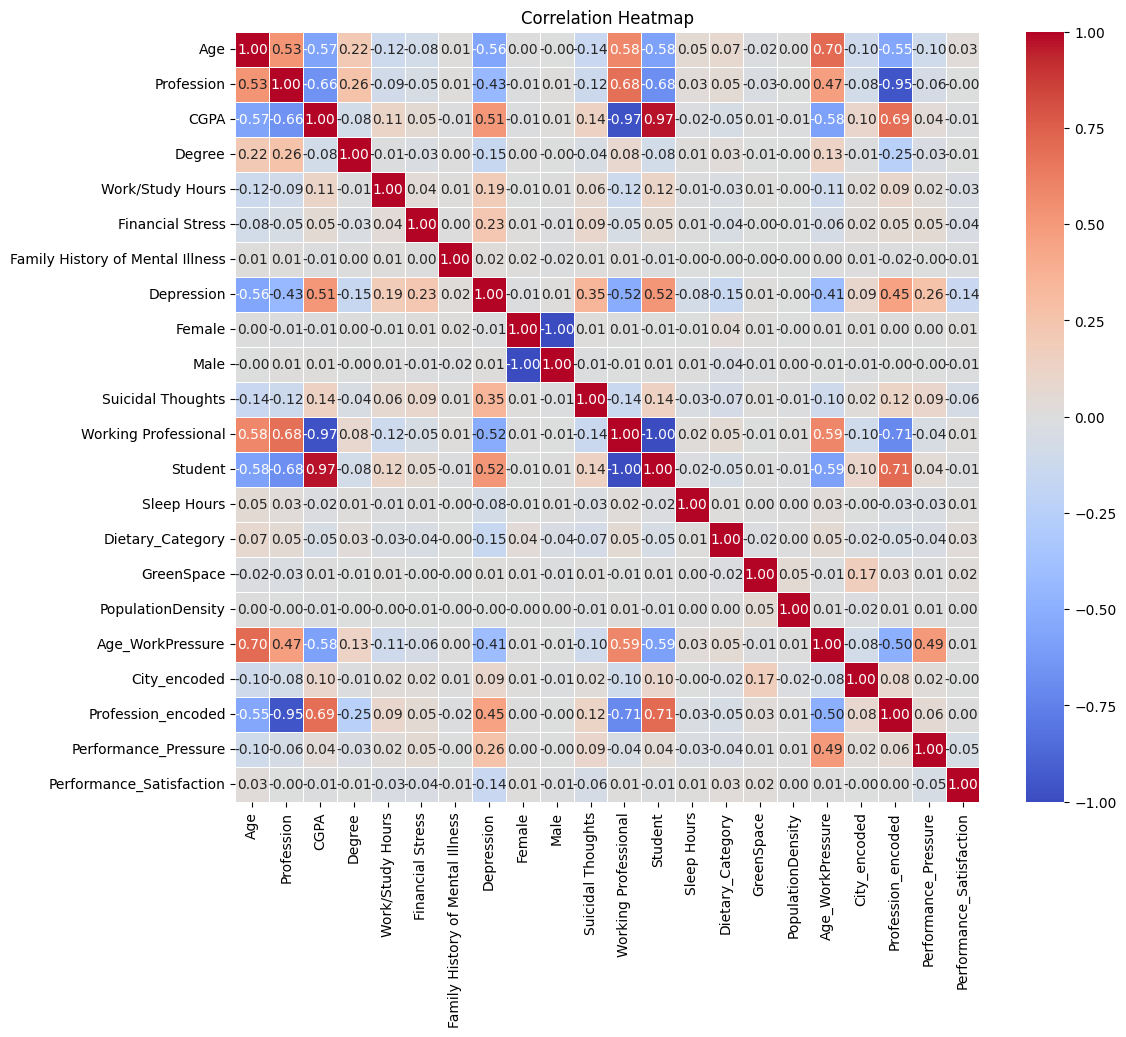

In [105]:
correlation_matrix = train_df.corr(numeric_only=True)

# ÏÉÅÍ¥Ä ÌñâÎ†¨ÏùÑ ÌûàÌä∏ÎßµÏúºÎ°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10)) # ÌûàÌä∏Îßµ ÌÅ¨Í∏∞ ÏÑ§Ï†ï (ÏõêÌïòÎäî ÌÅ¨Í∏∞Î°ú Ï°∞Ï†à Í∞ÄÎä•)
sns.heatmap(correlation_matrix,
            annot=True, # Í∞Å ÏÖÄÏóê ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∞í ÌëúÏãú
            cmap='coolwarm', # ÏÉâÏÉÅ
            fmt=".2f", # ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãú
            linewidths=.5) # ÏÖÄ Í≤ΩÍ≥ÑÏÑ† ÎëêÍªò ÏÑ§Ï†ï

plt.title('Correlation Heatmap') # Í∑∏ÎûòÌîÑ Ï†úÎ™© ÏÑ§Ï†ï
plt.show() # Í∑∏ÎûòÌîÑ ÌëúÏãú

# 6. Modeling

## 6.1. Pipeline development

In [84]:
train_df = train_df.drop(['Working Professional or Student', 'Name', 'Gender'], axis=1)
test_df = test_df.drop(['Working Professional or Student', 'Name', 'Gender'], axis=1)


In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Age                               140700 non-null  int64  
 1   City                              140700 non-null  object 
 2   Profession                        140700 non-null  int64  
 3   CGPA                              140700 non-null  int64  
 4   Degree                            140700 non-null  float64
 5   Work/Study Hours                  140700 non-null  float64
 6   Financial Stress                  140700 non-null  float64
 7   Family History of Mental Illness  140700 non-null  int64  
 8   Depression                        140700 non-null  int64  
 9   Female                            140700 non-null  int64  
 10  Male                              140700 non-null  int64  
 11  Suicidal Thoughts                 140700 non-null  i

In [86]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               93800 non-null  int64  
 1   City                              93800 non-null  object 
 2   Profession                        93800 non-null  int64  
 3   CGPA                              93800 non-null  int64  
 4   Degree                            93800 non-null  float64
 5   Work/Study Hours                  93800 non-null  float64
 6   Financial Stress                  93800 non-null  float64
 7   Family History of Mental Illness  93800 non-null  int64  
 8   Female                            93800 non-null  int64  
 9   Male                              93800 non-null  int64  
 10  Suicidal Thoughts                 93800 non-null  int64  
 11  Working Professional              93800 non-null  int64  
 12  Stud

In [87]:
train_df.head(4)

Age           City  Profession  CGPA  Degree  Work/Study Hours  \
0    7       Ludhiana           3     0     2.0               1.0   
1    3       Varanasi           3     0     4.0               7.0   
2    4  Visakhapatnam           0     8     2.0               3.0   
3    2         Mumbai           3     0     2.0              10.0   

   Financial Stress  Family History of Mental Illness  Depression  Female  \
0               2.0                                 0           0       1   
1               3.0                                 0           1       0   
2               1.0                                 0           1       0   
3               1.0                                 1           1       0   

   ...  Student  Sleep Hours  Dietary_Category  GreenSpace  PopulationDensity  \
0  ...        0          9.0               3.0        0.80             9781.0   
1  ...        0          4.5               1.0       24.78             2367.0   
2  ...        1          5.5               3.0        0.18             3900.0   
3  ...        0          4.5               2.0        9.36            20482.0   

   Age_WorkPressure  City_encoded  Profession_encoded  Performance_Pressure  \
0              35.0      0.192690            0.056323                   5.0   
1              12.0      0.142206            0.056323                   4.0   
2               0.0      0.159196            0.431698                   5.0   
3              10.0      0.131293            0.056323                   5.0   

   Performance_Satisfaction  
0                       2.0  
1                       3.0  
2                       2.0  
3                       1.0  

[4 rows x 23 columns]

In [88]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

# 1. Define features and target
X_train = train_df.drop('Depression', axis=1)
y_train = train_df['Depression']

# 2. Redefine columns for preprocessing
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# 3. Define preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('convert_to_float32', FunctionTransformer(lambda x: x.astype(np.float32)))
])

# Categorical Pipeline (Ordinal, Constant Impute)
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(
        dtype=None,                   # ‚≠ê Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÏßÄÏ†ï Ìï¥Ï†ú (ÏïàÏ†ïÏÑ± Ï¶ùÍ∞Ä)
        handle_unknown='use_encoded_value', # ‚≠ê Î≥µÍµ¨: Ïïå Ïàò ÏóÜÎäî Í∞í Ï≤òÎ¶¨ ÌôúÏÑ±Ìôî
        unknown_value=-1                   # ‚≠ê Î≥µÍµ¨: Ïïå Ïàò ÏóÜÎäî Í∞íÏùÄ -1Î°ú Ïù∏ÏΩîÎî©
    ))
])

# 4. Combine the numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

# 5. Apply the transformations to the training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(test_df)

# 6.ÏóÖÎç∞Ïù¥Ìä∏: Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞Î•º ÏµúÏ¢Ö ÌïôÏäµÏö©Í≥º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú Î∂ÑÎ¶¨
# (Ïù¥ ÏΩîÎìúÎ•º ÌÜµÌï¥ X_train_finalÍ≥º y_train_finalÏùÑ Î™®Îç∏ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï©ÎãàÎã§.)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_preprocessed,
    y_train,
    test_size=0.2,            # 20%Î•º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©
    random_state=rs,
    stratify=y_train          # ÌÉÄÍ≤ü Î≥ÄÏàòÏùò ÎπÑÏú®ÏùÑ Ïú†ÏßÄ
)

In [89]:
from sklearn.model_selection import train_test_split
# ...

# 1. Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(test_df)

# 2. ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏµúÏ¢Ö ÌïôÏäµÏö©(final)Í≥º Í≤ÄÏ¶ùÏö©(val)ÏúºÎ°ú Î∂ÑÎ¶¨ (A ÏΩîÎìú)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_preprocessed,
    y_train,
    test_size=0.2,            # 20%Î•º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©
    random_state=rs,
    stratify=y_train
)

## 6.2. Removing Outliers from Training Data using Isolation Forest

In [90]:
# Apply Isolation Forest for outlier detection on the training data
isolation_forest = IsolationForest(contamination=0.04, random_state=rs)
outlier_labels = isolation_forest.fit_predict(X_train_final)

# Filter out outliers from both X_train_preprocessed and y_train
non_outliers_mask = outlier_labels != -1
X_train_final = X_train_final[non_outliers_mask]
y_train_final = y_train_final[non_outliers_mask]

## 6.3. Defining Ensemble Models and Building a Stacking Classifier

In [91]:
xgb_params = {
     'learning_rate': 0.298913248058474,
     'max_depth': 9,
     'min_child_weight': 3,
     'n_estimators': 673,
     'subsample': 0.5933970249700855,
     'gamma': 2.597137534750985,
     'reg_lambda': 0.11328048420927406,
     'colsample_bytree': 0.1381203919800721
}

catboost_params = {
    'iterations': 145,
    'depth': 7,
    'learning_rate': 0.29930179265937246,
    'l2_leaf_reg': 1.242352421942431,
    'random_strength': 8.325681754379957,
    'bagging_temperature': 0.7869848919618048,
    'border_count': 139
}

hgb_params = {
    'learning_rate': 0.16299202834206894,
    'max_iter': 250,
    'max_depth': 4,
    'l2_regularization': 7.1826466833939895,
    'early_stopping': True
}

# Initialize models with pre-tuned and trial-specific parameters
xgb_model = XGBClassifier(**xgb_params, use_label_encoder=False, random_state=rs)
catboost_model = CatBoostClassifier(**catboost_params, task_type="CPU", random_state=rs, verbose=0)
hgb_model = HistGradientBoostingClassifier(**hgb_params, random_state=rs)

# Define stacking ensemble with the LightGBM model tuned in this trial
stacking_ensemble = StackingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('xgb', xgb_model),
        ('hgb', hgb_model)
    ],
    final_estimator=LogisticRegression(),
    passthrough=False
)

In [92]:
catboost_model_test = CatBoostClassifier(**catboost_params, task_type="GPU", random_state=rs, verbose=0)

## 6.4. CATBOOST Model

In [93]:
model = CatBoostClassifier(verbose=0)
model.fit(X_train_final, y_train_final,)

In [94]:
feat_importance = model.get_feature_importance()
feat_names = X_train.columns

pd.Series(feat_importance, index=feat_names).sort_values(ascending=False)

Age                                 22.820922
Male                                13.001678
Profession_encoded                  10.233782
Work/Study Hours                     7.875343
Performance_Pressure                 7.076004
Degree                               7.027122
PopulationDensity                    5.974246
Sleep Hours                          4.046675
Student                              2.694316
Age_WorkPressure                     2.637927
CGPA                                 2.545802
Performance_Satisfaction             2.289027
Dietary_Category                     2.229488
GreenSpace                           1.985209
Profession                           1.603801
Working Professional                 1.240558
City                                 1.093793
City_encoded                         1.028097
Suicidal Thoughts                    0.982580
Financial Stress                     0.954087
Family History of Mental Illness     0.364722
Female                               0.294821
dtype: float64

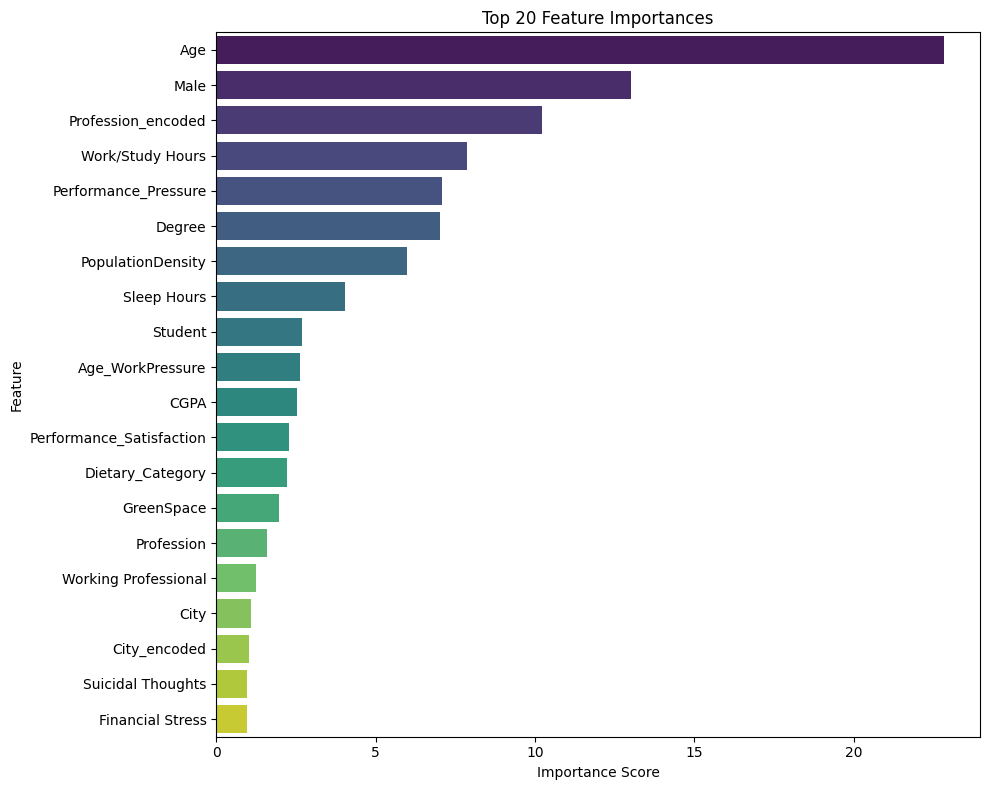

In [95]:
# prompt: feat_importance ÏãúÍ∞ÅÌôî

# Get feature importance
feat_importance = model.get_feature_importance()
feat_names = X_train.columns

# Create a pandas Series for easier handling
importance_series = pd.Series(feat_importance, index=feat_names).sort_values(ascending=False)

# Visualize the top N features
top_n = 20 # Adjust N as needed
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_series.head(top_n).values, y=importance_series.head(top_n).index, palette='viridis')
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [96]:
 #5-fold ÍµêÏ∞®Í≤ÄÏ¶ùÏúºÎ°ú ÌèâÍ∞ÄÌïòÎäî ÏΩîÎìú
# Define a scoring metric
scoring = make_scorer(accuracy_score)

# Perform cross-validation
cv_scores = cross_val_score(stacking_ensemble, X_train_final, y_train_final, cv=5, scoring=scoring)

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.94123635 0.94350361 0.94262181 0.93910509 0.94053954]
Mean CV Accuracy: 0.9414
Standard Deviation of CV Accuracy: 0.0015


## 6.5. Stackig_encsemble Model

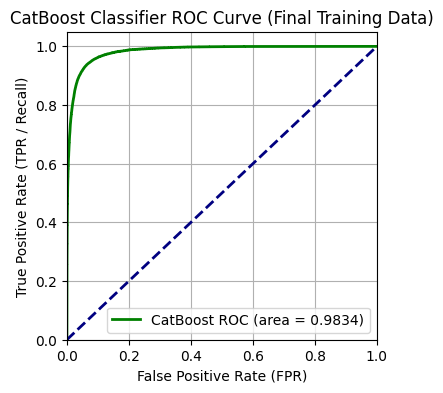

In [97]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 1. Î™®Îç∏ ÏòàÏ∏° ÌôïÎ•† (ÏûÖÎ†•: X_train_final)
y_train_proba = model.predict_proba(X_train_final)[:, 1]

# 2. ROC Í≥°ÏÑ†Ïóê ÌïÑÏöîÌïú FPR, TPR Í≥ÑÏÇ∞
# ‚≠ê ÏàòÏ†ï: y_train ÎåÄÏã† y_train_final ÏÇ¨Ïö©
fpr, tpr, thresholds = roc_curve(y_train_final, y_train_proba)

# 3. AUC(Area Under the Curve) Í∞í Í≥ÑÏÇ∞
roc_auc = auc(fpr, tpr)

# 4. ÏãúÍ∞ÅÌôî (ÏΩîÎìú ÏÉùÎûµ)
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='green', lw=2, label=f'CatBoost ROC (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('CatBoost Classifier ROC Curve (Final Training Data)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

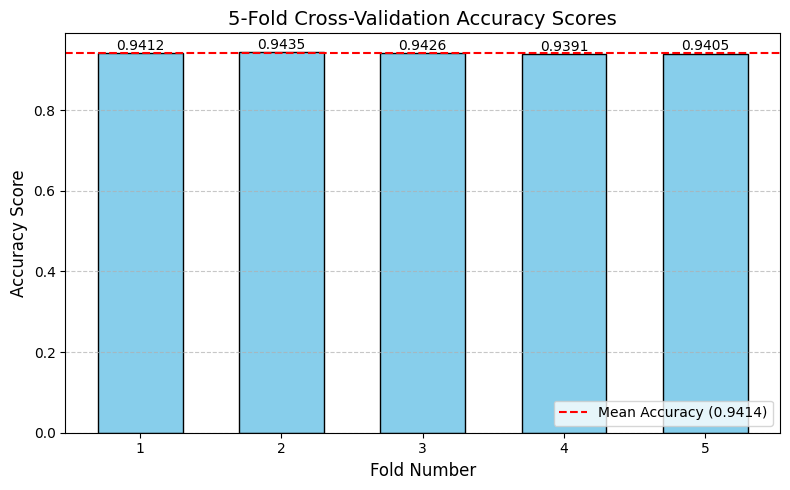

In [98]:
# cv_scores Î≥ÄÏàòÎäî Ïù¥Ï†Ñ ÏÖÄÏóêÏÑú Ï†ïÏùòÎêòÏóàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.

plt.figure(figsize=(8, 5))
folds = np.arange(1, len(cv_scores) + 1)
mean_score = cv_scores.mean()

# Ìè¥ÎìúÎ≥Ñ Ï†êÏàòÎ•º ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÌëúÏãú
plt.bar(folds, cv_scores, color='skyblue', width=0.6, edgecolor='black')

# ÌèâÍ∑† Ï†ïÌôïÎèÑ ÎùºÏù∏ Ï∂îÍ∞Ä
plt.axhline(mean_score, color='r', linestyle='--', linewidth=1.5, label=f'Mean Accuracy ({mean_score:.4f})')

# Í∞Å ÎßâÎåÄ ÏúÑÏóê Ï†êÏàò ÌëúÏãú
for i, score in enumerate(cv_scores):
    plt.text(folds[i], score + 0.0005, f'{score:.4f}', ha='center', va='bottom', fontsize=10)

plt.title('5-Fold Cross-Validation Accuracy Scores', fontsize=14)
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xticks(folds)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('cross_validation_scores_visualization.png')

In [99]:
# ÍµêÏ∞® Í≤ÄÏ¶ù (ÌèâÍ∞Ä)
cv_scores = cross_val_score(stacking_ensemble, X_train_final, y_train_final, cv=5, scoring=scoring)

# ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ (Fit the model)
stacking_ensemble.fit(X_train_final, y_train_final)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
test_preds = stacking_ensemble.predict(X_test_preprocessed)

In [100]:
from sklearn.metrics import roc_auc_score, classification_report

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú ÏòàÏ∏° ÌôïÎ•† Î∞è ÌÅ¥ÎûòÏä§ ÏòàÏ∏°
val_preds = stacking_ensemble.predict(X_val)
val_proba = stacking_ensemble.predict_proba(X_val)[:, 1]

# ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥º Ï∂úÎ†•
print("--- Validation Set Performance ---")
print(f"ROC AUC Score: {roc_auc_score(y_val, val_proba):.4f}")
print("\nClassification Report:\n", classification_report(y_val, val_preds))

--- Validation Set Performance ---
ROC AUC Score: 0.9731

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     23027
           1       0.85      0.79      0.82      5113

    accuracy                           0.94     28140
   macro avg       0.90      0.88      0.89     28140
weighted avg       0.94      0.94      0.94     28140



In [101]:
# Fit the model
stacking_ensemble.fit(X_train_final, y_train_final)

# Make predictions
test_preds = stacking_ensemble.predict(X_train_final)

In [102]:
# A ÏΩîÎìúÍ∞Ä ÏûàÎçò ÏÖÄÏùÑ Ï∞æÏïÑÏÑú ÏïÑÎûò Îëê Ï§ÑÏùÑ Îã§Ïãú Ïã§ÌñâÌï©ÎãàÎã§.
# ÏïàÏ†ÑÏùÑ ÏúÑÌï¥ X_train_preprocessedÎèÑ Îã§Ïãú ÎßåÎì≠ÎãàÎã§.
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(test_df)

In [103]:
# B ÏΩîÎìú ÏÖÄÏùÑ Ï∞æÏïÑÏÑú ÏïÑÎûò ÏòàÏ∏° Î∂ÄÎ∂ÑÎßå Îã§Ïãú Ïã§ÌñâÌï©ÎãàÎã§.
# ‚≠êÔ∏è Ïò¨Î∞îÎ•∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
test_preds = stacking_ensemble.predict(X_test_preprocessed)

In [104]:
# Create a DataFrame to hold the submission results
output = pd.DataFrame({'id': test_ids,
                       'Depression': test_preds})

# Save the DataFrame to a CSV file
output.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' successfully created!")

Submission file 'submission.csv' successfully created!
